<a href="https://colab.research.google.com/github/me-osama/Retail-Sales-Prediction-Regression-Project/blob/main/Retail_Sales_Prediction_(Regression_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

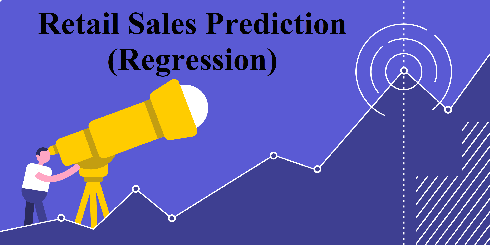

# **Project Name**    - Retail Sales Prediction (Regression)

##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name** - Md Osama

# **Project Summary -**

Rossmann, a company operating a network of over 3,000 drug stores across 7 European countries, faces the challenge of accurately predicting daily sales for up to six weeks in advance. Numerous factors contribute to the variability of store sales, such as promotions, competition, school and state holidays, seasonality, and locality. Each Rossmann store manager relies on their unique circumstances to forecast sales, resulting in varying levels of accuracy.

To address this issue, historical sales data for 1,115 Rossmann stores is provided. The objective is to forecast the "Sales" column for the test set, taking into account that certain stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

https://github.com/me-osama/Retail-Sales-Prediction-Regression-Project

# **Problem Statement**


**Rossmann operates an extensive network of drug stores spanning across 7 European countries, totaling more than 3,000 locations. The current responsibility assigned to Rossmann store managers entails predicting the daily sales for a period of up to six weeks in advance. The sales of these stores are influenced by a multitude of factors, which include promotions, competition, school and state holidays, seasonality, and the specific locality in which each store is situated. Due to the unique circumstances faced by individual managers, who number in the thousands, the accuracy of their sales predictions can exhibit considerable variation.**

**As part of this task, you have been granted access to historical sales data pertaining to 1,115 Rossmann stores. Your objective is to forecast the "Sales" column for the test set. It is important to note that certain stores within the dataset were temporarily closed for refurbishment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
from datetime import datetime
import scipy
import warnings    
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize':(8,6),'figure.dpi':100})

### Dataset Loading

In [2]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Load both the Dataset from the Drive
dataset_sales = pd.read_csv("/content/drive/MyDrive/Capstone_Project_Almabetter/ML_Project/Retail Sales Prediction/Rossmann Stores Data.csv")
dataset_store = pd.read_csv("/content/drive/MyDrive/Capstone_Project_Almabetter/ML_Project/Retail Sales Prediction/Store.csv")

### Dataset First View

In [4]:
#First look of sales data
dataset_sales.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
dataset_sales.shape

(1017209, 9)

In [6]:
#First look of store data
dataset_store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [7]:
dataset_store.shape

(1115, 10)

In [8]:
#Merge both the datafram and make a final datafram
merged_df = dataset_sales.merge(dataset_store, how='outer', on='Store')

#Make a copy of the final dataframe naming as df
df = merged_df.copy()

In [9]:
#First look of merged dataset
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [10]:
#Shape of merged dataset
df.shape

(1017209, 18)

### Dataset Rows & Columns count

In [11]:
#Dataset Rows & Columns count
print('The number of rows in df dataframe is:',df.shape[0])
print('The number of columns in df dataframe is',df.shape[1])

The number of rows in df dataframe is: 1017209
The number of columns in df dataframe is 18


### Dataset Information

In [12]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
duplicate_rows = df.duplicated().sum()
print('The number of duplicates in store data is:',duplicate_rows)

The number of duplicates in store data is: 0


#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64


<Axes: >

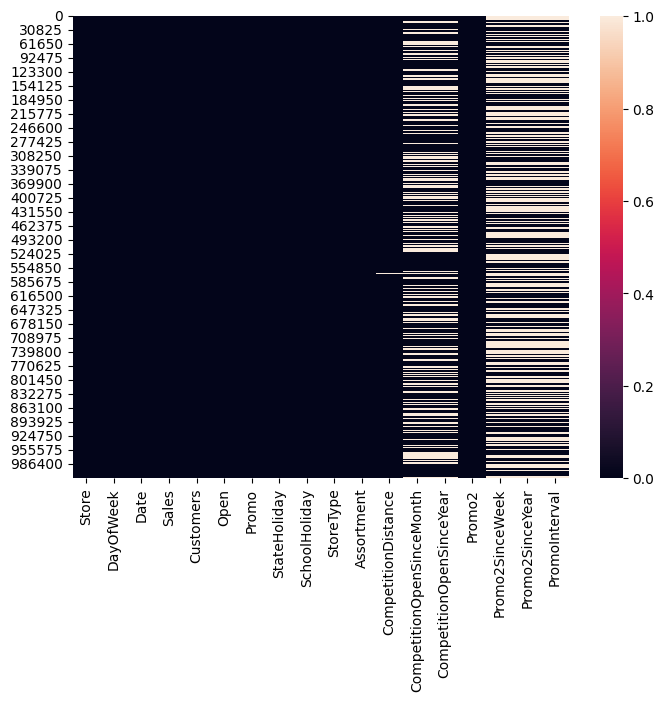

In [15]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=True)

### What did you know about your dataset?

The provided dataset corresponds to the retail industry of Rossmann, which manages an extensive network of more than 3,000 drug stores across 7 European countries. Our task involves analyzing the sales of these stores and identifying the factors that influence them. The dataset consists of 1,017,209 rows and 18 columns. While there are some missing values present, there are no duplicate values within the dataset.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
print(df.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [17]:
# Dataset Describe
df.describe()

Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  CompetitionDistance  \
count  1.017209e+06   1.017209e+06         1.014567e+06   
mean   3.815145e-01   1.786467e-01         5.430086e+03   
std    4.857586e-01   3.830564e-01         7.715324e+03   
min    0.000000e+00   0.000000e+00         2.000000e+01   
25%    0.000000e+00   0.000000e+00         7.100000e+02   
50%    0.000000e+00   0.000000e+00         2.330000e+03   
75%    1.000000e+00   0.000000e+00         6.890000e+03   
max    1.000000e+00   1.000000e+00         7.586000e+04   

       CompetitionOpenSinceMonth  CompetitionOpenSinceYear        Promo2  \
count              693861.000000             693861.000000  1.017209e+06   
mean                    7.222866               2008.690228  5.005638e-01   
std                     3.211832                  5.992644  4.999999e-01   
min                     1.000000               1900.000000  0.000000e+00   
25%                     4.000000               2006.000000  0.000000e+00   
50%                     8.000000               2010.000000  1.000000e+00   
75%                    10.000000               2013.000000  1.000000e+00   
max                    12.000000               2015.000000  1.000000e+00   

       Promo2SinceWeek  Promo2SinceYear  
count    509178.000000    509178.000000  
mean         23.269093      2011.752774  
std          14.095973         1.662870  
min           1.000000      2009.000000  
25%          13.000000      2011.000000  
50%          22.000000      2012.000000  
75%          37.000000      2013.000000  
max          50.000000      2015.000000

### Variables Description 

**The dataset includes the following information for each entry within the test set:**

1. Id: A unique identifier representing a (Store, Date) pair.
2. Store: A distinct identifier for each store.
3. Sales: The turnover recorded for a specific day (this is the value to be predicted).
4. Customers: The number of customers on a given day.
5. Open: An indicator (0 or 1) denoting whether the store was open or closed.
6. StateHoliday: Indicates a state holiday. Typically, most stores are closed on these days, with a few exceptions. Notably, all schools are closed on public holidays and weekends. The values are defined as follows: "a" = public holiday, "b" = Easter holiday, "c" = Christmas, "0" = None.
7. SchoolHoliday: Indicates if the (Store, Date) entry was affected by the closure of public schools.
8. StoreType: Categorizes the stores into four different models: "a," "b," "c," and "d."
9. Assortment: Describes the assortment level of a store: "a" = basic, "b" = extra, "c" = extended.
10. CompetitionDistance: Represents the distance in meters to the nearest competing store.
11. CompetitionOpenSince[Month/Year]: Provides an approximation of the month and year when the nearest competitor store opened.
12. Promo: Indicates whether a store ran a promotion on a particular day.
13. Promo2: Specifies if a store is participating in a continuing and consecutive promotion called Promo2. The values are: "0" = store is not participating, "1" = store is participating.
14. Promo2Since[Year/Week]: Describes the year and calendar week when the store started participating in Promo2.
15. PromoInterval: Describes the intervals at which Promo2 is launched, specifying the months when the promotion restarts. For example, "Feb,May,Aug,Nov" means that each cycle starts in February, May, August, and November of any given year for that store.

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in df.columns:
  if i in ['Sales','CompetitionDistance','Date']:
    continue
  else:
    print(f'Unique values in column {i} are',df[i].unique())

Unique values in column Store are [   1    2    3 ... 1113 1114 1115]
Unique values in column DayOfWeek are [5 4 3 2 1 7 6]
Unique values in column Customers are [ 555  546  523 ... 3727 4022 4106]
Unique values in column Open are [1 0]
Unique values in column Promo are [1 0]
Unique values in column StateHoliday are ['0' 'a' 'b' 'c' 0]
Unique values in column SchoolHoliday are [1 0]
Unique values in column StoreType are ['c' 'a' 'd' 'b']
Unique values in column Assortment are ['a' 'c' 'b']
Unique values in column CompetitionOpenSinceMonth are [ 9. 11. 12.  4. 10.  8. nan  3.  6.  5.  1.  2.  7.]
Unique values in column CompetitionOpenSinceYear are [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.   nan 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values in column Promo2 are [0 1]
Unique values in column Promo2SinceWeek are [nan 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique va

In [19]:
for i in df.columns.tolist():
  print(f"Total number of unique values in {i}, is ,{df[i].nunique()}")

Total number of unique values in Store, is ,1115
Total number of unique values in DayOfWeek, is ,7
Total number of unique values in Date, is ,942
Total number of unique values in Sales, is ,21734
Total number of unique values in Customers, is ,4086
Total number of unique values in Open, is ,2
Total number of unique values in Promo, is ,2
Total number of unique values in StateHoliday, is ,5
Total number of unique values in SchoolHoliday, is ,2
Total number of unique values in StoreType, is ,4
Total number of unique values in Assortment, is ,3
Total number of unique values in CompetitionDistance, is ,654
Total number of unique values in CompetitionOpenSinceMonth, is ,12
Total number of unique values in CompetitionOpenSinceYear, is ,23
Total number of unique values in Promo2, is ,2
Total number of unique values in Promo2SinceWeek, is ,24
Total number of unique values in Promo2SinceYear, is ,7
Total number of unique values in PromoInterval, is ,3


## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.

In [21]:
#Check unique values in 'StateHoliday' column of the dataframe
print(df['StateHoliday'].unique())

['0' 'a' 'b' 'c' 0]


Based on the above obtained output, it is clear that the 'StateHoliday' feature includes two types of zeros: one represented as an object type and the other as an integer type. Therefore, it becomes necessary to adjust the data type of the zero value that is currently assigned incorrectly.

In [22]:
#Convert above '0' string into integer or int type
df['StateHoliday'].replace({'0':0}, inplace=True)

#Print unique
print(df.StateHoliday.unique())

[0 'a' 'b' 'c']


In [23]:
#Check unique values in 'PromoInterval' column of the dataframe
print(df['PromoInterval'].unique())

[nan 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [24]:
#Check Unique Store types
print(df['StoreType'].unique())

['c' 'a' 'd' 'b']


In [25]:
#Categorical variables
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']
categorical_variables

['DayOfWeek',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [26]:
df['Date']

0          2015-07-31
1          2015-07-30
2          2015-07-29
3          2015-07-28
4          2015-07-27
              ...    
1017204    2013-01-05
1017205    2013-01-04
1017206    2013-01-03
1017207    2013-01-02
1017208    2013-01-01
Name: Date, Length: 1017209, dtype: object

In the given df['Date'] column, the data is given in the string type. So, convert it into datetime data type.

In [27]:
#Convert 'Date' column of the dataset to a datetime data type
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

#Extract year, month, and day from the 'Date' column
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.isocalendar().week
df['DayOfYear'] = df['Date'].dt.dayofyear

In [28]:
#Extracting day from date and time
df["Day"] = df['Date'].dt.day_name()

In [29]:
#Extracting Months from date and time
df["Months"] = df["Date"].dt.month_name()

In [30]:
#Check average sale of each type of store
print('Average sale of store a is: ',df[df['StoreType'] == 'a']['Sales'].mean())
print('Average sale of store b is: ',df[df['StoreType'] == 'b']['Sales'].mean())
print('Average sale of store c is: ',df[df['StoreType'] == 'c']['Sales'].mean())
print('Average sale of store d is: ',df[df['StoreType'] == 'd']['Sales'].mean())

Average sale of store a is:  5738.179710202728
Average sale of store b is:  10058.837334175616
Average sale of store c is:  5723.6292458345515
Average sale of store d is:  5641.819243109884


In [31]:
#Counts of Store of Each Type
df.StoreType.value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [32]:
#Check Sale on weekend
sale_weekend = df.groupby(['StoreType','Day'])['Sales'].mean().reset_index()
sale_weekend.rename(columns={'Sales': 'Mean Sales on Day'}, inplace=True)
sale_weekend

StoreType        Day  Mean Sales on Day
0          a     Friday        6648.808335
1          a     Monday        7924.611934
2          a   Saturday        5335.876841
3          a     Sunday          40.814943
4          a   Thursday        6313.106618
5          a    Tuesday        7212.646675
6          a  Wednesday        6664.173464
7          b     Friday       10529.217717
8          b     Monday       10873.392540
9          b   Saturday        7879.622114
10         b     Sunday       11266.873446
11         b   Thursday       10032.087704
12         b    Tuesday        9992.135362
13         b  Wednesday        9837.231922
14         c     Friday        6628.198257
15         c     Monday        7574.061331
16         c   Saturday        6574.173926
17         c     Sunday           0.000000
18         c   Thursday        6104.138356
19         c    Tuesday        6784.022447
20         c  Wednesday        6379.229619
21         d     Friday        6703.631346
22         d     Monday        7553.093990
23         d   Saturday        6329.017877
24         d     Sunday          21.899879
25         d   Thursday        6003.426795
26         d    Tuesday        6585.025763
27         d  Wednesday        6276.054964

In [33]:
#Now check Sale on each months, and try to find sale on summer vacation
sale_month_wise = df.groupby(['Months'])['Sales'].mean().sort_values()
sale_month_wise

Months
January      5465.395529
May          5489.639973
October      5537.037419
September    5570.246033
February     5645.253150
August       5693.016554
April        5738.866916
June         5760.964375
March        5784.578871
November     6008.111821
July         6064.915711
December     6826.611377
Name: Sales, dtype: float64

In [34]:
#Drop 'Months' and 'Day' column from df dataframe
df.drop(['Months','Day'], axis=1, inplace=True)

In [35]:
#Store Type and Sales Exploration
store_type = df.groupby("StoreType")["Sales","Customers"].sum().reset_index()
store_type.sort_values(["Sales","Customers"], ascending= False, inplace = True)  #To get higher values, sort in the descending order
store_type.rename(columns={'Sales': 'Total number of Sale'}, inplace=True)
store_type.rename(columns={'Customers': 'Total number of Customers'}, inplace=True)
store_type

StoreType  Total number of Sale  Total number of Customers
0         a            3165334859                  363541434
3         d            1765392943                  156904995
2         c             783221426                   92129705
1         b             159231395                   31465621

In [36]:
#Check open store
store_open = df.groupby("StoreType")["Open","StateHoliday","SchoolHoliday"].sum().reset_index()
store_open

StoreType    Open  SchoolHoliday
0         a  457077          98413
1         b   15563           2916
2         c  112978          24653
3         d  258774          55739

In [37]:
store_assortment = df.groupby(['StoreType'])['Promo','Promo2'].count().reset_index()
store_assortment 

StoreType   Promo  Promo2
0         a  551627  551627
1         b   15830   15830
2         c  136840  136840
3         d  312912  312912

In [38]:
#All the columns
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'WeekOfYear',
       'DayOfYear'],
      dtype='object')

In [39]:
#Check sales in each assortment and storetype 
sales_in_each_assortemt =df.groupby(['StoreType','Assortment'])['Sales'].sum().reset_index()
sales_in_each_assortemt

StoreType Assortment       Sales
0         a          a  1870105131
1         a          c  1295229728
2         b          a    71357761
3         b          b    70946312
4         b          c    16927322
5         c          a   400260421
6         c          c   382961005
7         d          a   604026757
8         d          c  1161366186

In [40]:
#Daily sales numbers over time.
sales_date = df.groupby(by='Date').agg({'Sales': 'sum'}).reset_index()
sales_date

Date     Sales
0   2013-01-01     97235
1   2013-01-02   6949829
2   2013-01-03   6347820
3   2013-01-04   6638954
4   2013-01-05   5951593
..         ...       ...
937 2015-07-27  10707292
938 2015-07-28   9115073
939 2015-07-29   8499962
940 2015-07-30   8798854
941 2015-07-31  10109742

[942 rows x 2 columns]

In [41]:
#Check promo interval
df.PromoInterval.values

array([nan, nan, nan, ..., 'Mar,Jun,Sept,Dec', 'Mar,Jun,Sept,Dec',
       'Mar,Jun,Sept,Dec'], dtype=object)

In [42]:
#Average sales in month and year
df.groupby(['year','month'])['Sales'].mean()

year  month
2013  1        5211.555578
      2        5494.371397
      3        5820.349168
      4        5483.749836
      5        5364.127383
      6        5402.162960
      7        6042.062260
      8        5729.574049
      9        5322.988430
      10       5429.258788
      11       5864.601614
      12       6703.618140
2014  1        5431.875799
      2        5731.091512
      3        5584.257312
      4        5815.993333
      5        5632.670534
      6        5681.526188
      7        5999.403381
      8        5649.421252
      9        5865.104029
      10       5665.564878
      11       6179.249661
      12       6973.282456
2015  1        5752.747866
      2        5710.296541
      3        5949.130132
      4        5916.857578
      5        5472.122002
      6        6199.203976
      7        6142.705511
Name: Sales, dtype: float64

In [43]:
#Now, exploring store types along with assortment , state holiday and avg sales according to mean or average
df.groupby(['StoreType','Assortment','StateHoliday'])['Sales'].mean()

StoreType  Assortment  StateHoliday
a          a           0                5568.329797
                       a                  99.287144
                       b                   0.000000
                       c                   0.000000
           c           0                6498.024887
                       a                 149.526042
                       b                  76.975113
                       c                  19.907277
b          a           0               10796.756580
                       a               11918.106796
                       b               12901.809524
                       c                9369.500000
           b           0                8465.878626
                       a               11276.294798
                       b               11846.740741
                       c               10276.058824
           c           0               17958.629630
                       a               18410.142857
                       b    

### What all manipulations have you done and insights you found?

Upon thoroughly examining the dataset, we meticulously analyzed each variable and uncovered a significant correlation between the target variable, sales, and the independent predictor variables. Our investigation led us to identify four distinct types of stores, with type-a stores being the most prevalent while type-b stores were the least common. Surprisingly, despite their lower numbers, type-b stores exhibited the highest average sales.

However, when considering the overall sales, type-a stores emerged as the top performers. A closer examination of customer data segmented by store type revealed that type-a stores attracted the highest number of visits, indicating a larger customer base.

Naturally, we became intrigued by the exceptionally high sales of type-a stores. To delve deeper into this phenomenon, we conducted further investigations and uncovered that type-a stores not only outnumbered other types but also boasted a larger customer base. Additionally, our analysis of store assortment unveiled that type-b stores had the lowest assortment level, while type-a stores offered the highest variety of products. Furthermore, it became evident that type-b assortments contributed minimally to the overall sales, as indicated below.

In [44]:
sales_in_each_assortemt

StoreType Assortment       Sales
0         a          a  1870105131
1         a          c  1295229728
2         b          a    71357761
3         b          b    70946312
4         b          c    16927322
5         c          a   400260421
6         c          c   382961005
7         d          a   604026757
8         d          c  1161366186

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Donut chart on Independant Variable Assortment (Univariate)

a    537445
c    471470
b      8294
Name: Assortment, dtype: int64


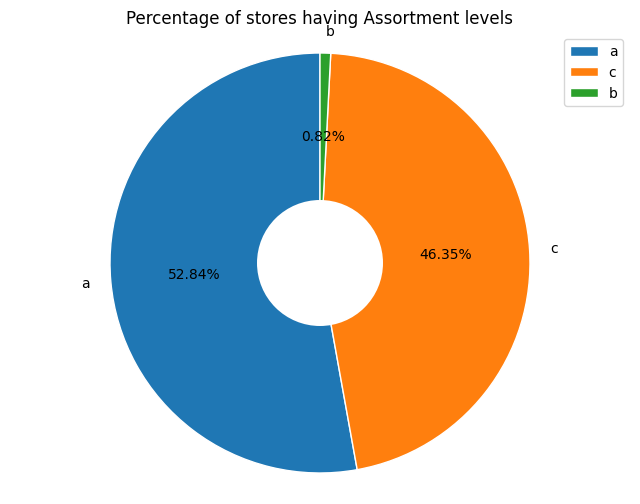

In [45]:
# Chart - 1 visualization code
# Display value counts
print(df.Assortment.value_counts())

# Dependent Variable Column Visualization
assortment_counts = df['Assortment'].value_counts()
labels = assortment_counts.index
fig, ax = plt.subplots()
ax.pie(assortment_counts, labels=labels, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Draw a white circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.30, fc='white')
fig.gca().add_artist(center_circle)

# Add a title and legend
ax.set_title('Percentage of stores having Assortment levels')
ax.legend(labels, loc='best')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

I choosed a donut chart due to its capacity to simplify intricate data by breaking it down into smaller, easily understandable slices. This visualization technique aids in comprehending complex information more effectively. Furthermore, the donut chart is particularly well-suited for displaying categorical features, making it a suitable choice for this specific context.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart provided above, the following insights can be derived:

- 52.8% of the stores implement a basic type assortment strategy (denoted by 'a').
- 46.3% of the stores adopt an extended type assortment strategy (denoted by 'c').
- Only 0.8% of the stores utilize an extra type assortment strategy (denoted by 'b'). It is evident that the majority of the stores prioritize either a basic or extended assortment strategy.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the field of retailing, an assortment strategy refers to the process of selecting and displaying a specific number and type of products for customers to purchase in a store. Notably, there has been a noticeable upward trend in the adoption of both basic (a) and extended (c) assortment strategies. This positive growth can be attributed to the fact that stores implementing these strategies generally observe favorable sales growth. On the contrary, stores that employ the extra type assortment strategy (b) tend to experience a decline in sales. As a result, it can be inferred that the majority of stores are not inclined towards utilizing the extended (c) assortment strategy.

#### Chart - 2 Donut chart on StoreType (Univariate) Independent variable

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64


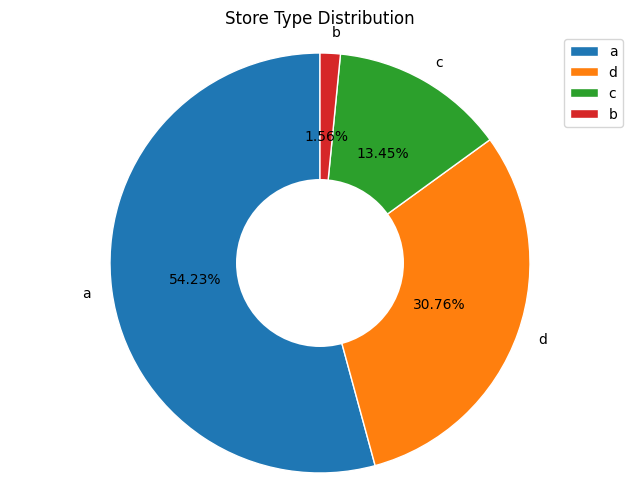

In [46]:
#Chart - 2 visualization code
# Display value counts
print(df.StoreType.value_counts())

# Calculate the percentage for each category
percentages = df['StoreType'].value_counts(normalize=True) * 100

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(percentages, labels=percentages.index, autopct='%1.2f%%', startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create a donut chart
center_circle = plt.Circle((0, 0), 0.40, fc='white')
fig.gca().add_artist(center_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')

# Set a title and legend for the chart
ax.set_title('Store Type Distribution')
ax.legend(labels=percentages.index)

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

The purpose of using a donut chart in this case is to visually represent the distribution of different 'StoreType' categories while also displaying the percentage values for each category. The hole in the center of the donut chart allows for additional information to be displayed, such as a legend or a title.

By using a donut chart, I can effectively convey both the relative proportions of each category and the corresponding percentage values in a single chart. This can be helpful in understanding the distribution and relative importance of different categories in a concise and visually appealing manner.

##### 2. What is/are the insight(s) found from the chart?

I found the following insights from the above chart.
- 54.23% of the stores belong to Type 'a' Store model.
- 30.76% of the stores belong to Type 'd' Store model.
- 13.45% of the stores belong to Type 'c' Store model.
- 1.56% of the stores belong to Type 'b' Store model.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the dataset, the stores are categorized into four different types. It is evident that Type 'a' has the highest number of stores. However, this analysis does not provide insights into the sales growth. In future analyses, we will explore the sales growth and its related factors

#### Chart - 3 Pie chart to see percentage of open or close stores (Univariate)

1    844392
0    172817
Name: Open, dtype: int64


<Axes: title={'center': 'StateHoliday Types'}, ylabel='Open'>

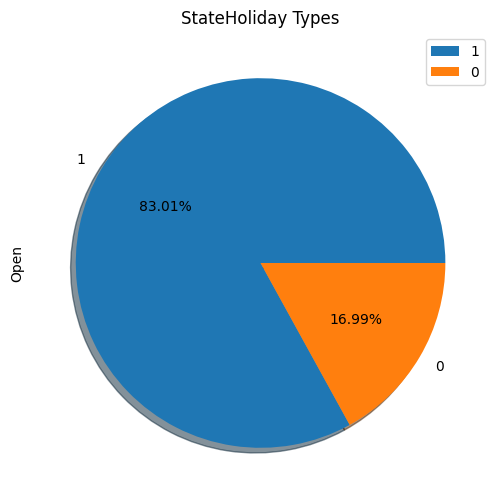

In [47]:
# Chart - 3 visualization code
#Number of open and closed stores
print(df['Open'].value_counts())

#Pie chart to see percentage of open and closed stores
df['Open'].value_counts().plot.pie(title='StateHoliday Types', legend=True, autopct='%1.2f%%', shadow=True)

##### 1. Why did you pick the specific chart?

A pie chart is a suitable choice for visualizing the distribution of open and closed stores in the given data. This chart type presents data in a circular format, with each category represented as a sector of the chart. By using a pie chart, we can easily understand the proportion of open and closed stores relative to the total number of stores. The circular shape helps convey the whole dataset, emphasizing the relationship between different categories. Additionally, the use of labels on the sectors provides clear identification of whether a store is open or closed, enabling easy interpretation of the chart without the need for a separate legend.

##### 2. What is/are the insight(s) found from the chart?

In the above insight "1" stands for open stores, and "0" stands for closed stores. In the above pie chart we can see that 83.01% of stores are open and 16.99% of stores are closed. The open stores are generating sales and the closed stores are closed due to state holidays, school holidays or temporary closures for refurbishment.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The 'Open' feature in the dataset provides information about the operational status of the stores, indicating whether they are open or closed. Based on the available data, it is observed that approximately 83% of the stores are marked as open, which signifies a positive business impact. This high percentage suggests that the majority of Rossmann's operations are active and generating sales. On the other hand, approximately 17% of the stores are recorded as closed. The closures could be attributed to various factors such as state holidays, school holidays, or temporary closures for refurbishment. These closures might have an impact on Rossmann's overall sales performance, as they represent a significant portion of the company's store network. To gain deeper insights into the sales dynamics, further analysis will be conducted to explore the potential influence of other factors on Rossmann's sales performance.

#### Chart - 4 Bar Plot of categorical variable the basis of Sales (Bivariate)

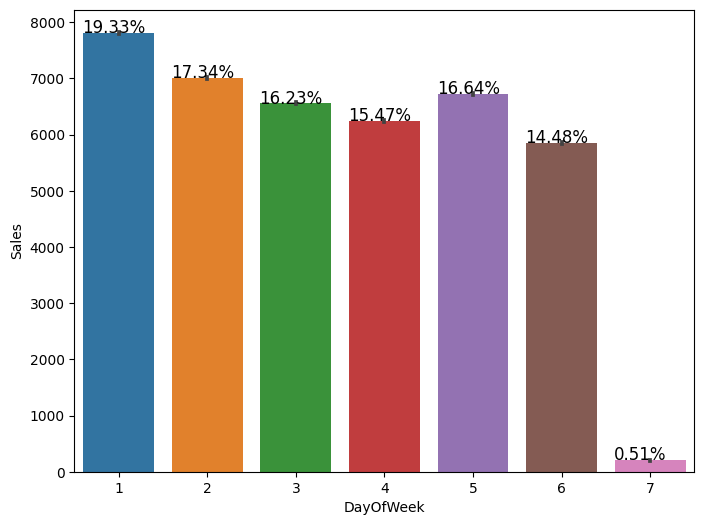

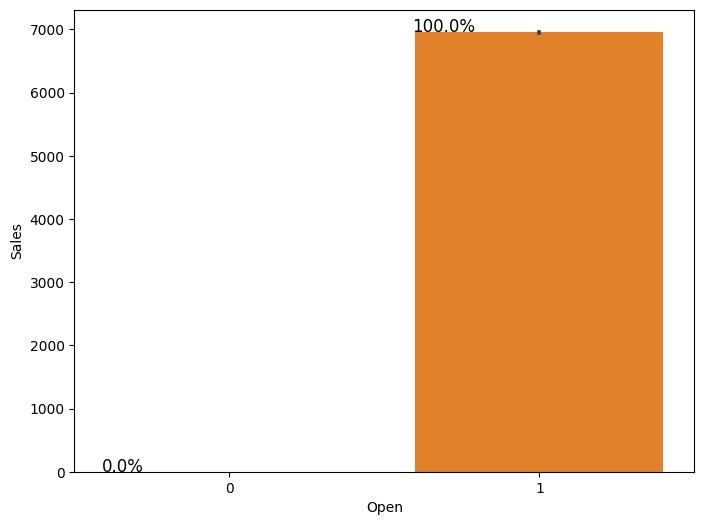

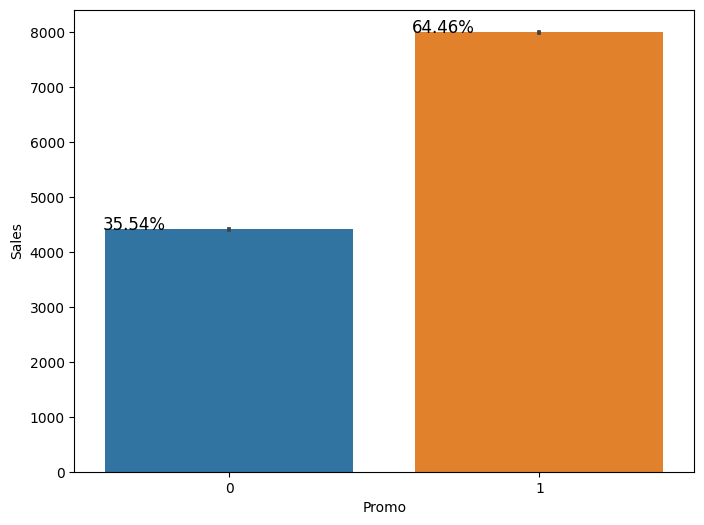

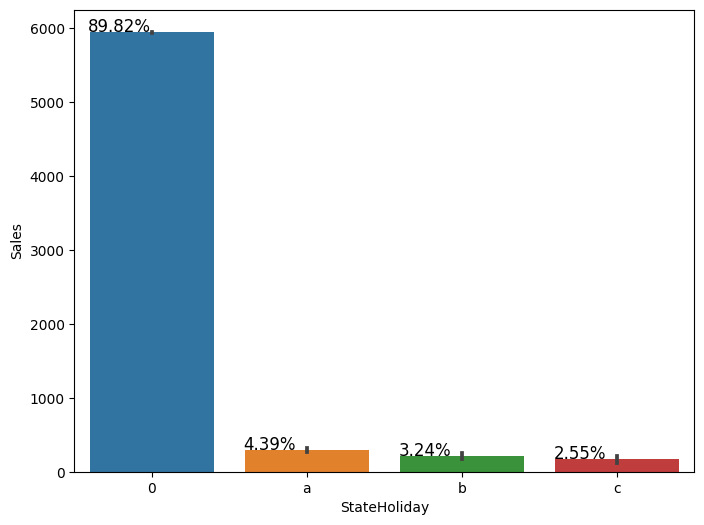

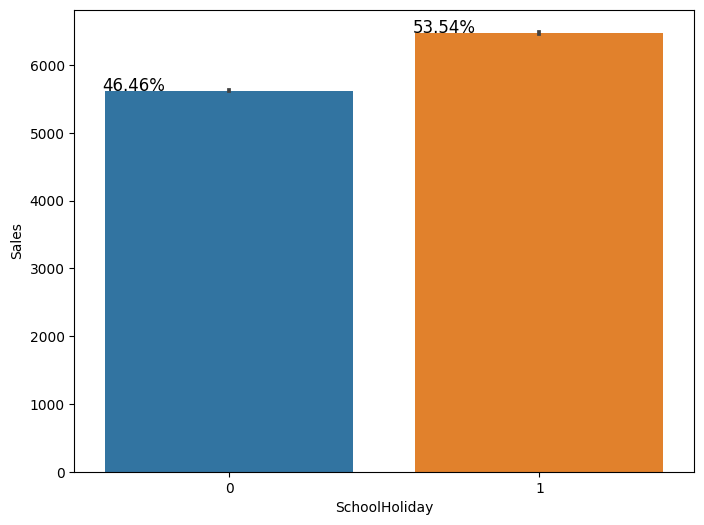

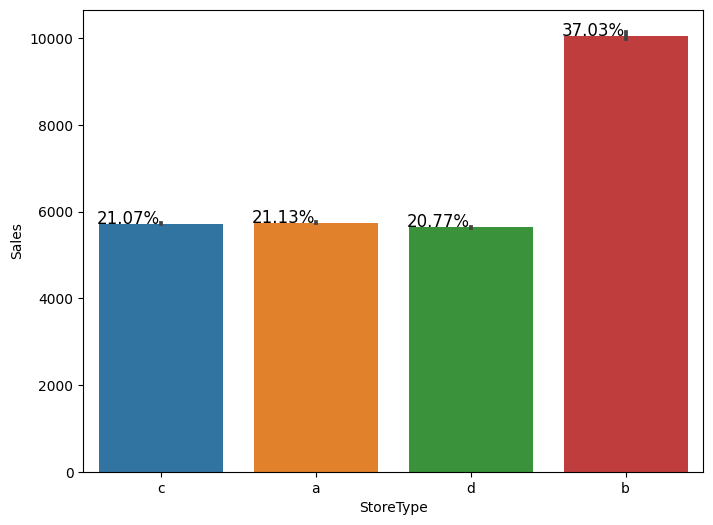

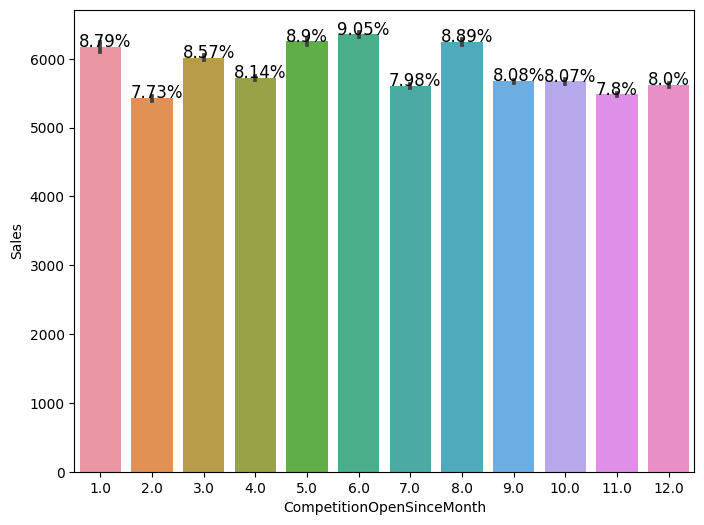

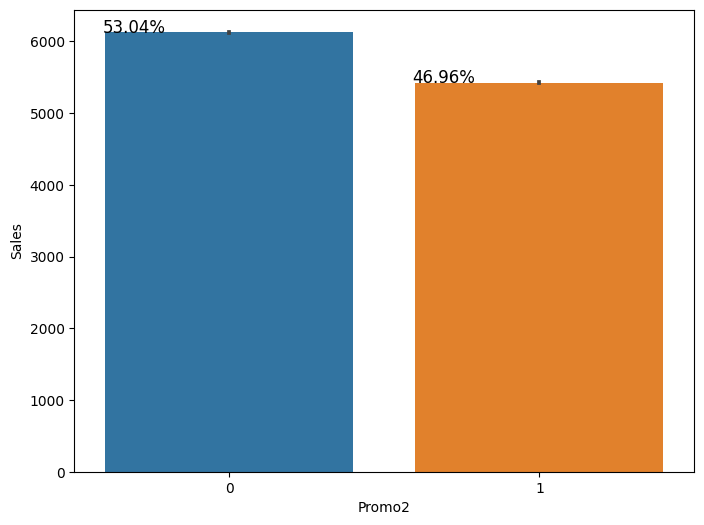

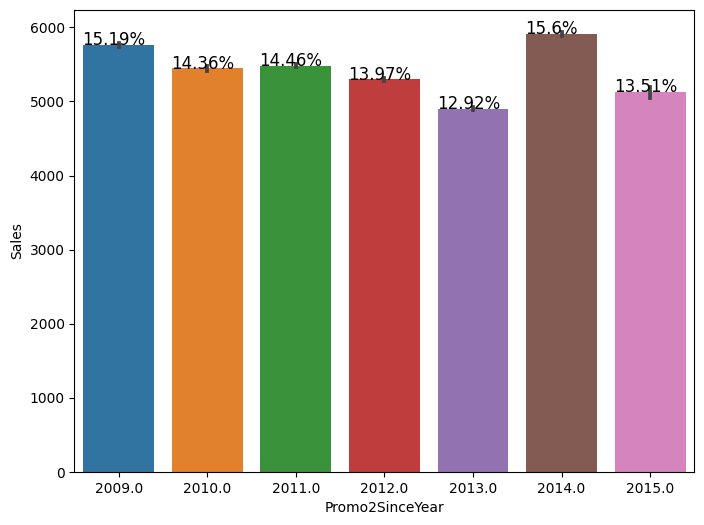

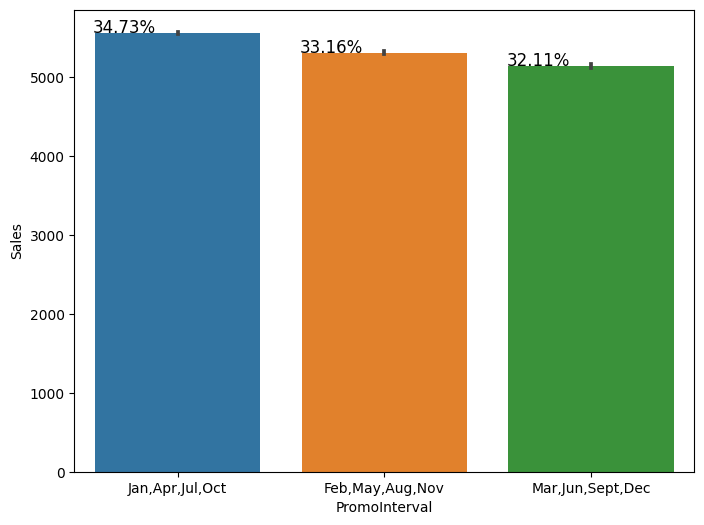

In [48]:
# Chart - 4 visualization code
#A list of various categorical variables.
independent_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','CompetitionOpenSinceMonth',
                         'Promo2','Promo2SinceYear','PromoInterval']

#Create a bar plot for each independent variable in a DataFrame, with the y-axis representing the 'Sales' variable
for var in independent_variables:
  ax = sns.barplot(x=df[var], y=df['Sales'])
  #Now  show percentage at bar plot
  totals = []
  for i in ax.patches:
      totals.append(i.get_height())
      total = sum(totals)

  for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)

  plt.show()

##### 1. Why did you pick the specific chart?

We chossed to use bar plot for this analysis as it is a powerful tool for comparing and visually representing different categories of data while displaying precise values. In our specific scenario, we are examining the relationship between various categorical variables and the target variable, Sales, with the aim of assessing the influence of each variable on the sales performance of Rossmann stores. By employing a bar plot, we can effectively evaluate and compare the impact of different categorical variables on sales, gaining insights into the factors that contribute to the success of Rossmann stores

##### 2. What is/are the insight(s) found from the chart?

We conducted a thorough analysis by comparing various categorical variables to gain insights from the plots:

**Day of Week vs Sales:** We observed that sales are highest on Mondays (19.3%) and lowest on Sundays (0.51%). This indicates that many stores are closed on Sundays, leading to lower sales.

**Promo vs Sales:** Stores offering promotions or discounts have higher sales, accounting for 64.46% of total sales. In contrast, stores not offering promotions only contribute to 35.54% of total sales.

**State Holiday vs Sales: **There are four categories for state holidays: 0 (no holiday), a (public holiday), b (Easter holiday), and c (Christmas). We found that sales are relatively low on Christmas (2.55%), suggesting that fewer stores are open on that day, resulting in decreased sales.

**School Holiday vs Sales:** Analyzing the effect of school holidays on sales, we found that stores closed for school holidays experience a sales decrease of 46.46%. However, compared to state holidays, more stores tend to be open during school holidays, leading to higher sales.

**Store Type vs Sales:** Rossmann chain has four store types: "a," "b," "c," and "d." Comparing the average sales percentage for each type, we observed that "a" stores have the highest average sales at 37.03%, while the other store types have relatively similar average sales.

Competition Open Since Month vs Sales: The data reveals that sales peak in June, indicating fewer competing stores open during that month. Increased competition tends to result in decreased sales for a particular store.

**Promo 2 vs Sales:** Stores participating in Promo 2, offering discounts, account for 46.96% of total sales, while stores not participating in Promo 2 contribute to 53.04% of total sales, indicating a negative growth in sales.

**Competition Open Since Year vs Sales: **Sales were high in 2014, suggesting fewer competing stores open during that year.

**Promo Interval vs Sales:** Promo Interval refers to consecutive intervals in Promo 2. Stores not participating in any interval have the highest average sales. Among stores participating in the Promo Interval, the first interval (Jan, Apr, Jul, Oct) exhibits the highest average sales compared to the other intervals.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On Mondays, sales show a notable increase, indicating the importance of leveraging sales data to effectively manage inventory and avoid stock shortages, thereby fostering a positive business impact.

Promotional activities contribute to higher sales and foster positive growth within the business.

Christmas negatively affects sales, potentially due to the reduced number of open stores on that day.

School holidays tend to have a negative impact on sales, likely due to decreased overall sales during these periods.

Store type 'b' demonstrates a positive impact on sales as it comprises fewer stores but achieves higher average sales compared to other store types. Conversely, store type 'a' experiences a negative impact due to a larger number of stores with comparatively lower average sales.

Stores participating in promo 2 exhibit lower sales, resulting in negative growth and a negative business impact.

In 2014, there was less competition, leading to positive growth in sales and a favorable business impact. Conversely, sales declined from 2009 to 2013, suggesting an increase in competition during that period.

Among the promo intervals, the first interval (Jan, Apr, Jul, Oct) shows the highest average sales, contributing to positive growth in sales.

#### Chart - 5 Box Plot of Assortment on the basis of Sales (Bivariate)

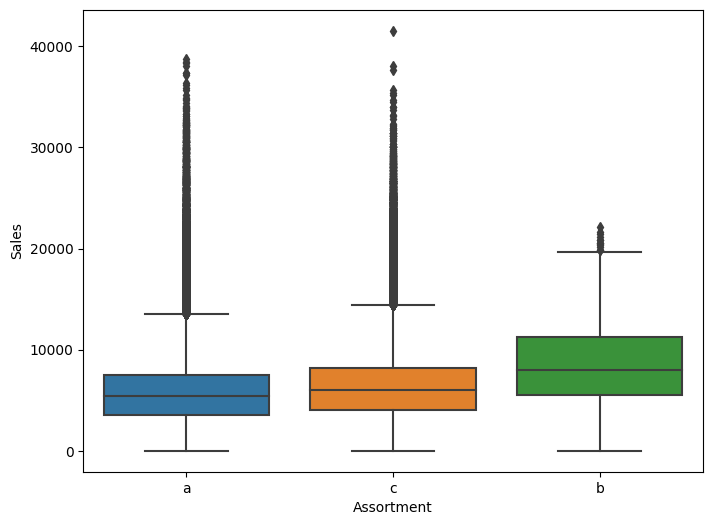

In [49]:
# Chart - 5 visualization code
#Show box plot (use 'Assortment' in x axis and 'Sales' in y axis)
sns.boxplot(x=df['Assortment'],y=df['Sales'])
plt.show()

##### 1. Why did you pick the specific chart?

The box plot is a valuable and informative visual representation that allows for the concise summary and comparison of one or multiple data sets. Its effectiveness lies in its ability to quickly summarize and compare outcomes from different experiments or scenarios. In the present context, we utilize box plots to effortlessly compare the sales performance of each assortment strategy by examining their respective 5-point summary, which encompasses:

Median Value: This represents the middle value of the data, dividing it into two equal halves. It provides a measure of the central tendency.

Lower Quartile (Q1): This indicates the value below which 25% of the data points fall. It provides insights into the lower range of the data.

Upper Quartile (Q3): This signifies the value below which 75% of the data points fall. It offers insights into the upper range of the data.

Highest Value: This represents the maximum value observed in the data set, providing information on the upper extreme.

Lowest Value: This denotes the minimum value observed in the data set, offering information on the lower extreme.

By examining these components within the box plot, we can easily compare the assortment strategies and gain valuable insights into their sales performance.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the plot, the following observations can be made:

Median Sales Value: The b type assortment exhibits the highest median sales value compared to the other assortment types.

Highest Sale Value: The c type assortment records the highest sales among all the assortment levels.

Maximum Sales Count: The maximum number of sales for any assortment strategy does not surpass 10,000 sales. Moreover, both the a and c type assortment strategies display a notable number of outliers in their sales data.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

In the retail industry, an assortment strategy pertains to the selection and arrangement of products that a store offers for sale. By examining the aforementioned plot, retailers can gain insights into which assortment strategies are more likely to result in positive sales growth. Notably, the b:Extra assortment strategy stands out as a promising option, indicating that implementing this strategy can potentially lead to significant growth in sales for the retailer.

#### Chart - 6 Scatter plot between Sales and competition distance on the basis of Multivariate Store Type

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

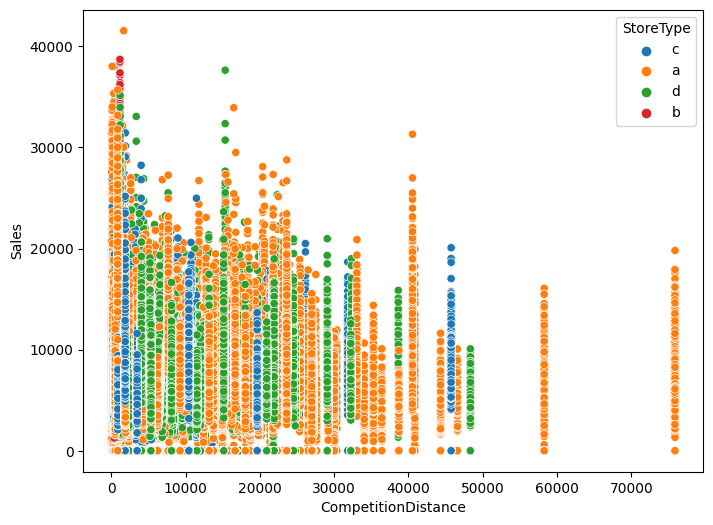

In [50]:
# Chart - 6 visualization code
#Show scatter plot between Sales and CompetitionDistance
x = 'Sales'
y = 'CompetitionDistance'
sns.scatterplot(data=df, x=y, y=x, hue='StoreType')

##### 1. Why did you pick the specific chart?

In this analysis, we have used a scatter plot to effectively examine the correlation between two numerical variables. By plotting sales against competition distance, we aim to discern any potential relationship or patterns between these two factors. The scatter plot provides a visual representation that allows us to observe the distribution and clustering of data points, enabling us to gain insights into the potential impact of competition distance on sales.

##### 2. What is/are the insight(s) found from the chart?

In this analysis, it is evident that as competition distances decrease, indicating stores located in close proximity to each other, sales reach their peak. This observation may be attributed to the potential effect of intensified competition among stores. Lower competition distances could lead to competitive pricing strategies, attracting a larger customer base and ultimately resulting in higher sales. The proximity of competing stores may create a favorable environment for customers to compare prices and make purchase decisions, driving increased sales.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The above plot holds the potential to generate a positive business impact for Rossmann. By visually examining the relationship between the distance between stores and their respective sales, managers can gain a clear understanding of how this factor influences the overall sales performance. This knowledge enables them to make informed decisions regarding store locations, such as identifying optimal distances between stores to maximize sales potential. By strategically managing store placement based on the insights gained from the plot, Rossmann can enhance its sales performance and drive positive business outcomes.

#### Chart - 7 Line Plot of Date: basis of sales (Bivariate)

In [51]:
# Chart - 7 visualization code
#Create a line plot with markers to visualize the sales over time
fig = go.Figure()
fig.add_trace(go.Scatter(x = sales_date['Date'], y = sales_date['Sales'], mode ='lines + markers', name ='actual'))
fig.update_layout(title ='Sales over Time', xaxis_title='Date', yaxis_title='Total Sales', xaxis = dict(showgrid = False), yaxis = dict(showgrid = False))
fig.show()

##### 1. Why did you pick the specific chart?

We used a line plot to depict the sales data over time based on the date variable. This choice was made due to the line plot's ability to provide a clear visual representation of the sales trend at each specific date, allowing for easy interpretation by simply hovering the mouse cursor over the plot. By utilizing this interactive feature, viewers can obtain precise information about sales values at specific dates, facilitating a comprehensive understanding of the sales performance over time.

##### 2. What is/are the insight(s) found from the chart?

Based on the provided plot, we can observe that the highest recorded sale occurred on December 16, 2013, reaching a value of 15.62 million. However, the majority of sales data points are clustered below the 300K mark, indicating that most sales fall within this lower range. This insight suggests that while occasional high sales spikes occur, the general trend of sales tends to remain relatively modest, with a significant portion of sales falling below the 300K threshold.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The presented graph holds the potential to generate a positive business impact for Rossmann. By visually depicting the sales variation on different dates, months, and years, the managers gain valuable insights into the sales patterns and trends over time. This information empowers them to make informed decisions aimed at increasing sales. For example, they can identify specific dates or periods that consistently yield high sales and strategize promotional campaigns or targeted marketing efforts during those times. Additionally, they can analyze the factors contributing to low sales periods and implement measures to address any potential challenges. By leveraging the insights gained from this graph, Rossmann managers can make data-driven decisions to optimize sales performance and drive positive business outcomes.

#### Chart - 8 Stacked Bar Plot (used for store type and promo data: basis of sales (Multivariate))

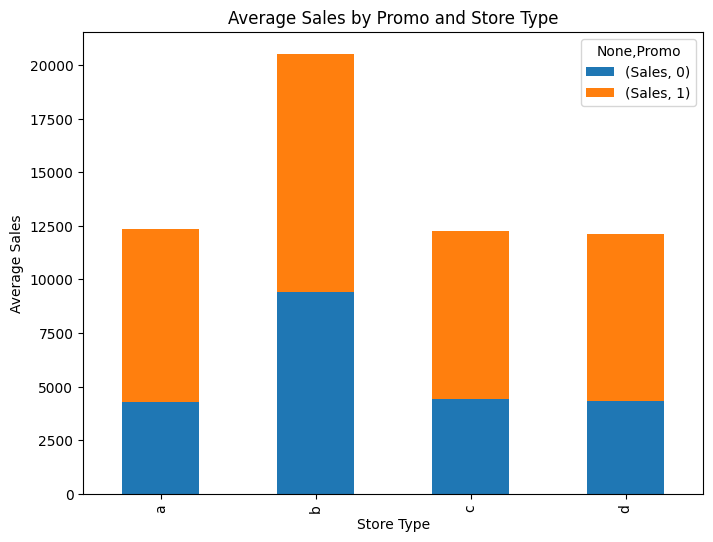

In [52]:
# Chart - 8 visualization code

#Using grouped aggregation based on the columns 'Promo' and 'StoreType', to calculate the mean of the 'Sales' column
df_plot = df.groupby(['Promo', 'StoreType'])['Sales'].mean().reset_index()

#Now, reshape using pivot with 'StoreType' as the index and 'Promo' as the columns
x = df_plot.pivot(columns='Promo', index='StoreType')

# Create a stacked bar plot
x.plot(kind='bar', stacked=True)

# Set the title and labels
plt.title('Average Sales by Promo and Store Type')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')

# Display the plot
plt.show()

##### 1. Why did you pick the specific chart?

In this analysis, a stacked bar plot has been chosen as it effectively compares multiple quantities. By stacking the bars, we can visually analyze the relationship between different variables and their respective quantities. In this case, the stacked bar plot allows us to compare the average sales across different store types and promotional strategies, providing insights into the impact of promotions on sales performance within each store type.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the stacked bar plot, we observe that the promotional impact on sales varies across different store types. For store types a, c, and d, running a promotion leads to significantly higher sales compared to stores that are not running a promotion. However, in the case of store type b, the increase in sales while running a promotion is relatively minimal compared to the other store types. This indicates that promotional strategies may have a stronger impact on driving sales for store types a, c, and d, while for store type b, other factors might play a more crucial role in influencing sales performance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the above plot have the potential to create a positive business impact. The plot provides a clear visualization of how promotional strategies affect the sales of each store type. This information enables Rossmann managers to make informed decisions about future promotional activities. They can identify which store types are most responsive to promotions and strategically plan promotions for those specific store types to maximize sales. By leveraging these insights, Rossmann can effectively allocate resources and develop targeted promotional strategies that align with the sales patterns of each store type, ultimately leading to increased sales and positive business outcomes.

#### Chart - 9 Bar plot: To show the average sales of all individual store type by using various Assortment strategies.(Multivariate)

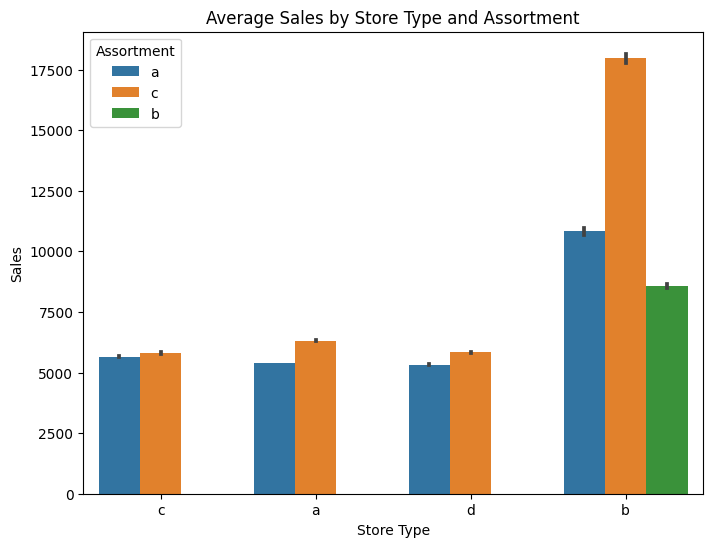

In [53]:
# Chart - 9 visualization code

#Create a bar plot to represent the average sales of all individual store type by using various Assortment strategies
ax = sns.barplot(x=df['StoreType'], y=df['Sales'], hue=df['Assortment'])         #Seaborn bar plot
plt.title('Average Sales by Store Type and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

In this plot, we have used a sub bar plot to compare the average sales of different store types based on their assortment levels or strategies. The x-axis represents the store types, the y-axis represents the average sales, and the bars are categorized by the assortment levels using different colors. The figure size is set to 12 inches by 6 inches for better visibility. The plot is labeled with a title, x-axis label, and y-axis label to provide clear information. This visualization helps us compare the average sales across different store types and assortment strategies.

##### 2. What is/are the insight(s) found from the chart?

In the above plot, we can observe the following insights:

Store types a, c, and d primarily follow assortment strategies a and c, while store type b follows a, b, and c strategies. This indicates that different store types have varied approaches to their assortment strategies.

Among the assortment strategies, stores following strategy c tend to have higher sales compared to other strategies. This suggests that strategy c may be more effective in generating higher sales for the stores.

By analyzing this plot, we can gain valuable insights into the relationship between store types, assortment strategies, and sales. This information can be used by Rossmann managers to make informed decisions regarding assortment planning and strategy selection, potentially leading to positive business impact and improved sales performance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the plot are valuable in generating a positive business impact for Rossmann. By analyzing the relationship between store types, assortment strategies, and sales, the store manager can make informed decisions to optimize sales performance. This information helps identify the most effective assortment strategy for each type of store, enabling the manager to align the product offerings with customer preferences and maximize sales potential. Ultimately, by implementing the optimal assortment strategy for each store type, Rossmann can enhance customer satisfaction, drive sales growth, and achieve positive business outcomes.

#### Chart - 10 Representing Monthly Sales over years using Multiple Line plot.(Multivariate)

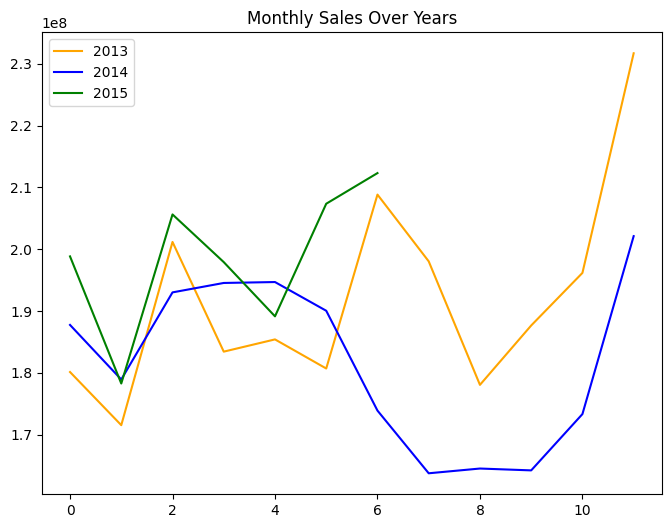

In [54]:
# Chart - 10 visualization code

# Calculate total sales for each month in 2013
sales_data_for_2013 = df[df['year'] == 2013].groupby('month')['Sales'].sum().reset_index()

# Calculate total sales for each month in 2014
sales_data_for_2014 = df[df['year'] == 2014].groupby('month')['Sales'].sum().reset_index()

# Calculate total sales for each month in 2015  
sales_data_for_2015 = df[df['year'] == 2015].groupby('month')['Sales'].sum().reset_index()

# Plot the sales data for each year
plt.plot(sales_data_for_2013['Sales'], label='2013', color='orange')
plt.plot(sales_data_for_2014['Sales'], label='2014', color='blue')
plt.plot(sales_data_for_2015['Sales'], label='2015', color='green')

plt.title('Monthly Sales Over Years')
plt.legend()
plt.show()                                                                       # Display the plot of monthly sales over the years

##### 1. Why did you pick the specific chart?

Multiple line plots were utilized to showcase the sales data for each year (2013, 2014, and 2015) and highlight the variations in sales over the same time period. This type of chart is particularly effective in differentiating and comparing the sales trends across multiple years, providing a clear visual representation of the changes in sales over time.

##### 2. What is/are the insight(s) found from the chart?

From the plot, we obtained the following insights:

Sales data for 2015 is only available for 6 months, limiting the comparison to the previous years.

In January 2015, there was a significant decrease in sales compared to the same month in previous years. However, the total sales for January 2015 were higher than those of 2013 and 2014.

February showed a notable increase in sales in 2013 and 2015 compared to 2014. Additionally, the total sales for February 2015 were higher than in the previous two years.

August and September of 2014 had the lowest sales compared to the same months in 2013, while the other months showed varying sales patterns.

In 2013, the lowest sales figure was recorded in January (170 million), while the highest sales were achieved in December (230 million).

For 2014, the lowest sales occurred in August and September (85 million), whereas the highest sales were recorded in December (200 million).

December exhibited a significant increase in sales for each year.

The sales pattern in 2013 showed a rapid recovery (V-shaped) following a decline, while the sales in 2014 followed a more sinusoidal wave-like pattern with periodic fluctuations.

By analyzing these insights, Rossmann managers can gain a deeper understanding of sales trends over the years and make informed decisions to optimize sales performance in the future.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the plot have the potential to generate a positive business impact for Rossmann. By analyzing the monthly sales trends depicted in the plot, store managers can obtain valuable information regarding the sales performance throughout the year. This knowledge allows them to identify patterns, such as seasonal fluctuations and peak sales periods, which can inform decision-making and strategic planning.

By understanding the monthly sales patterns, managers can allocate resources effectively, optimize inventory management, and plan promotional activities to capitalize on high-demand periods. Additionally, they can identify areas where sales may be lagging and take proactive measures to address any challenges.

Overall, the insights provided by the plot enable Rossmann store managers to make data-driven decisions that can enhance sales performance, drive revenue growth, and contribute to the overall success of the business.

#### Chart - 11  Bar Plot: For representing relationship between state Holiday and Store Type basis of Sales.(Multivariate)

In [55]:
# Chart - 11 visualization code
#Create a function to display the percentage values on top of each bar in a bar plot:
def with_percent(ax, data):
    totals = []                                                                  #Empty list in which data will be appended
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    
    for i in ax.patches:
        ax.text(i.get_x() + i.get_width() / 2, i.get_height(), f'{round((i.get_height() / total) * 100, 2)}%', ha='center', va='bottom')

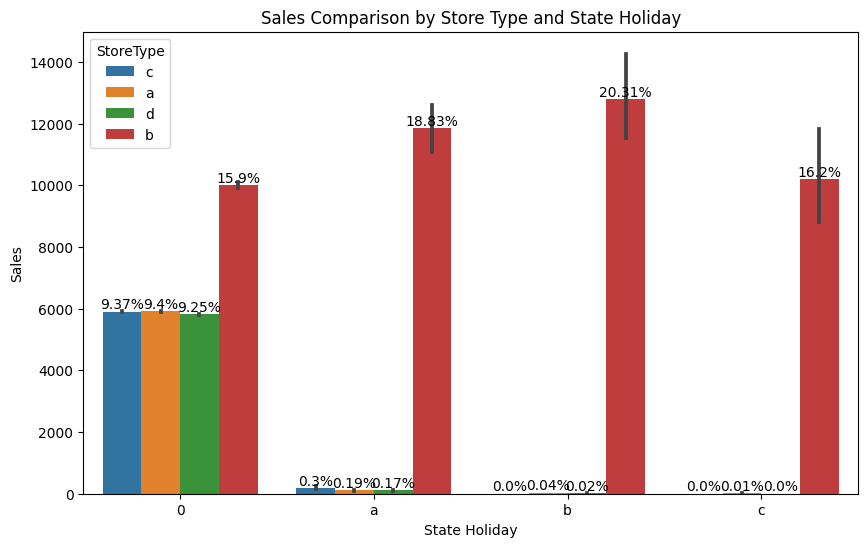

In [56]:
#Now, use the above with_percent function to display the relationship between state Holiday and Store Type basis of Sales
plt.figure(figsize=(10,6))
ax = sns.barplot(x=df['StateHoliday'], y=df['Sales'], hue=df['StoreType'])
with_percent(ax,df['Sales'])
plt.title('Sales Comparison by Store Type and State Holiday')
plt.xlabel('State Holiday')
plt.ylabel('Sales')
plt.show()

##### 1. Why did you pick the specific chart?

In this code, we have used bar plots to compare the sales of each store type on different state holidays. The x-axis represents the state holidays, the y-axis represents the sales, and the different colors represent different store types. Adjust the code according to your specific data and requirements.

##### 2. What is/are the insight(s) found from the chart?

Based on the analysis of the above plot:

Store type b consistently achieves the highest sales, regardless of whether it is a state holiday or not. This suggests that this store type remains open during state holidays and maintains high sales throughout.

Store types a, c, and d show negligible sales during state holidays. However, when there are no state holidays, they exhibit approximately 10% of the sales compared to store type b.

The difference in sales between store type b and the other store types is significant, indicating that store type b has a stronger sales performance overall.

These insights provide valuable information for creating a positive business impact. Store managers can consider the success of store type b during state holidays and explore ways to improve sales for store types a, c, and d during such periods. This may involve developing strategies to attract customers and increase sales, even when state holidays are in effect.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the plot are valuable for creating a positive business impact. By examining the impact of state holidays on the sales of each store type, the Rossmann store manager can make informed decisions regarding drug stock management. They can analyze the sales patterns during state holidays for different store types and ensure that each store type has adequate drug stock to meet customer demands. This strategic approach can help optimize sales during state holidays and contribute to the overall positive business impact for Rossmann.

#### Chart - 12  Using Scatter plot to represent the relationship between Store Type and Customers on the basis of Sales.(Multivariate)

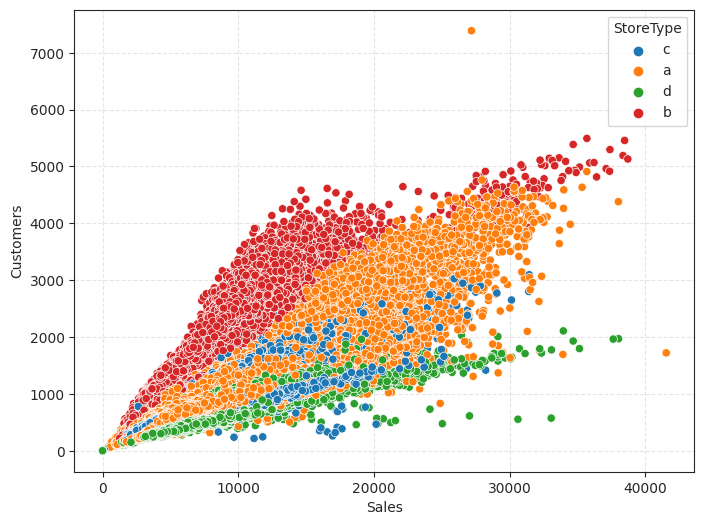

In [57]:
# Chart - 12 visualization code

#Create scatter plot to represent the relationship between Store Type and Customers on the basis of Sales.
#Set style as ticks
sns.set_style('ticks')
sns.scatterplot(x=df['Sales'], y=df['Customers'], hue=df['StoreType'])

#Changing grid
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##### 1. Why did you pick the specific chart?

We have used a scatter plot with a white grid style to visualize the relationship between sales and the number of customers for each store type. The scatter plot allows us to observe the distribution of data points and identify any potential patterns or correlations. By adding the store type as a hue parameter, we can differentiate the data points belonging to different store types.

Scatter plots are effective in highlighting patterns and trends in data. By examining this plot, we can gain insights into how the number of customers correlates with the sales for different store types.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the plot above, several observations can be made:

Store type b exhibits a higher number of customers at lower sales values, suggesting a preference for lower-priced drugs. Customers in this store type are more inclined towards frequent purchases of affordable items.

Store type a shows a proportional increase in both sales and customer numbers. As sales increase, there is a corresponding growth in the number of customers. This indicates a consistent customer base that expands alongside sales.

In contrast, store types c and d display a lower number of customers despite higher sales figures. This suggests that customers in these store types tend to purchase more expensive drugs. The focus here is on higher-priced items, resulting in a smaller customer base.

By understanding these patterns, Rossmann store managers can tailor their strategies to maximize sales potential based on the preferences and behavior of customers in each store type.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insights derived from the analysis of the plot are instrumental in generating a positive business impact for Rossmann. By gaining a deeper understanding of customer behavior specific to each store type, the store manager can make informed decisions to drive sales growth.

Understanding the preferences and tendencies of customers in different store types allows for the implementation of targeted strategies. For instance, in store type b, efforts can be focused on promoting and stocking lower-priced drugs to cater to the customer demand for affordable options. In store type a, strategies can be devised to further enhance the existing customer base and maintain the proportional relationship between sales and customer numbers.

Similarly, in store types c and d, where higher-priced drugs are favored, specific measures can be taken to attract customers and optimize sales potential. By aligning business decisions with the insights gained from customer behavior analysis, the Rossmann store manager can effectively tailor their marketing, inventory, and pricing strategies to meet the unique needs of each store type, ultimately leading to increased sales and positive business outcomes.

#### Chart - 13 Show total sales in every month of each year using Stacked bar plot.

Text(0, 0.5, ' Total Sales')

<Figure size 1200x400 with 0 Axes>

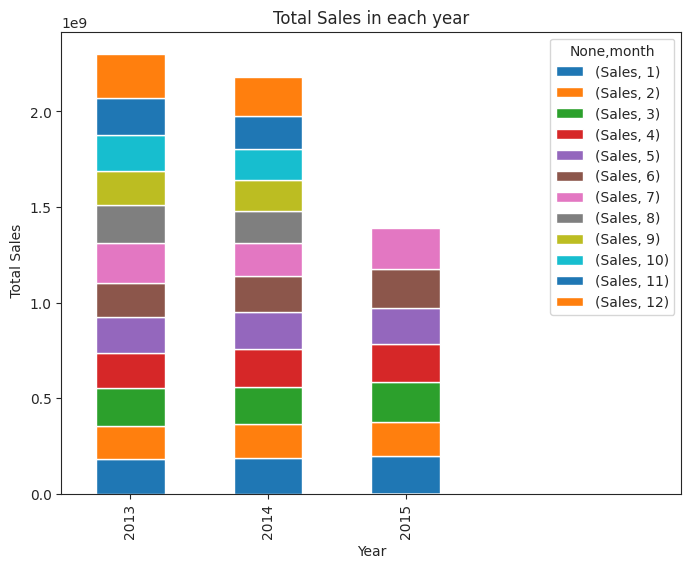

In [58]:
# Chart - 13 visualization code

#Using group by operation between year and month for calculating total sales
df_plot = df.groupby(['year','month'])['Sales'].sum().reset_index()

#Now, visualize the staked bar plot
x = df_plot.pivot(columns='month', index='year')
plt.figure(figsize = (12,4))
x.plot(kind ='bar', stacked=True)

#Now, set the x-axis limit
plt.xlim(-0.5,4)
plt.title('Total Sales in each year')
plt.xlabel("Year")
plt.ylabel(" Total Sales")

##### 1. Why did you pick the specific chart?

Here, we have utilized a stacked bar plot as it facilitates the breakdown and comparison of different components within a whole. Each bar in the plot represents a total value, and the segmented sections within the bar represent distinct categories or parts of that total. The utilization of different colors aids in distinguishing between the various categories presented in the bar. In this specific scenario, we have employed this plot to compare the total sales for each month across different years.

##### 2. What is/are the insight(s) found from the chart?

By examining the plot above, we can derive the following conclusions:

In 2013, the months of February, July, and December had the highest total sales.
For the year 2014, the total sales were relatively consistent across all months, except for December, which experienced the highest sales.

In 2015, sales data is available for only seven months, and December again had the highest sales.

When comparing the sales across the three years, it is evident that there has been a decline in sales over time.

These insights provide a comprehensive overview of the sales trends throughout the years, enabling Rossmann store managers to make informed decisions to optimize sales performance.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights are highly valuable in generating a positive business impact as they provide the Rossmann store manager with crucial information about the total sales for each month. This knowledge enables the manager to identify the months with the highest sales and make informed decisions regarding drug stock management. By effectively managing the stock levels, the store can prevent stock shortages and ensure that they are adequately prepared to meet customer demand during peak sales periods.

#### Chart - 14 - Correlation Heatmap

<Axes: >

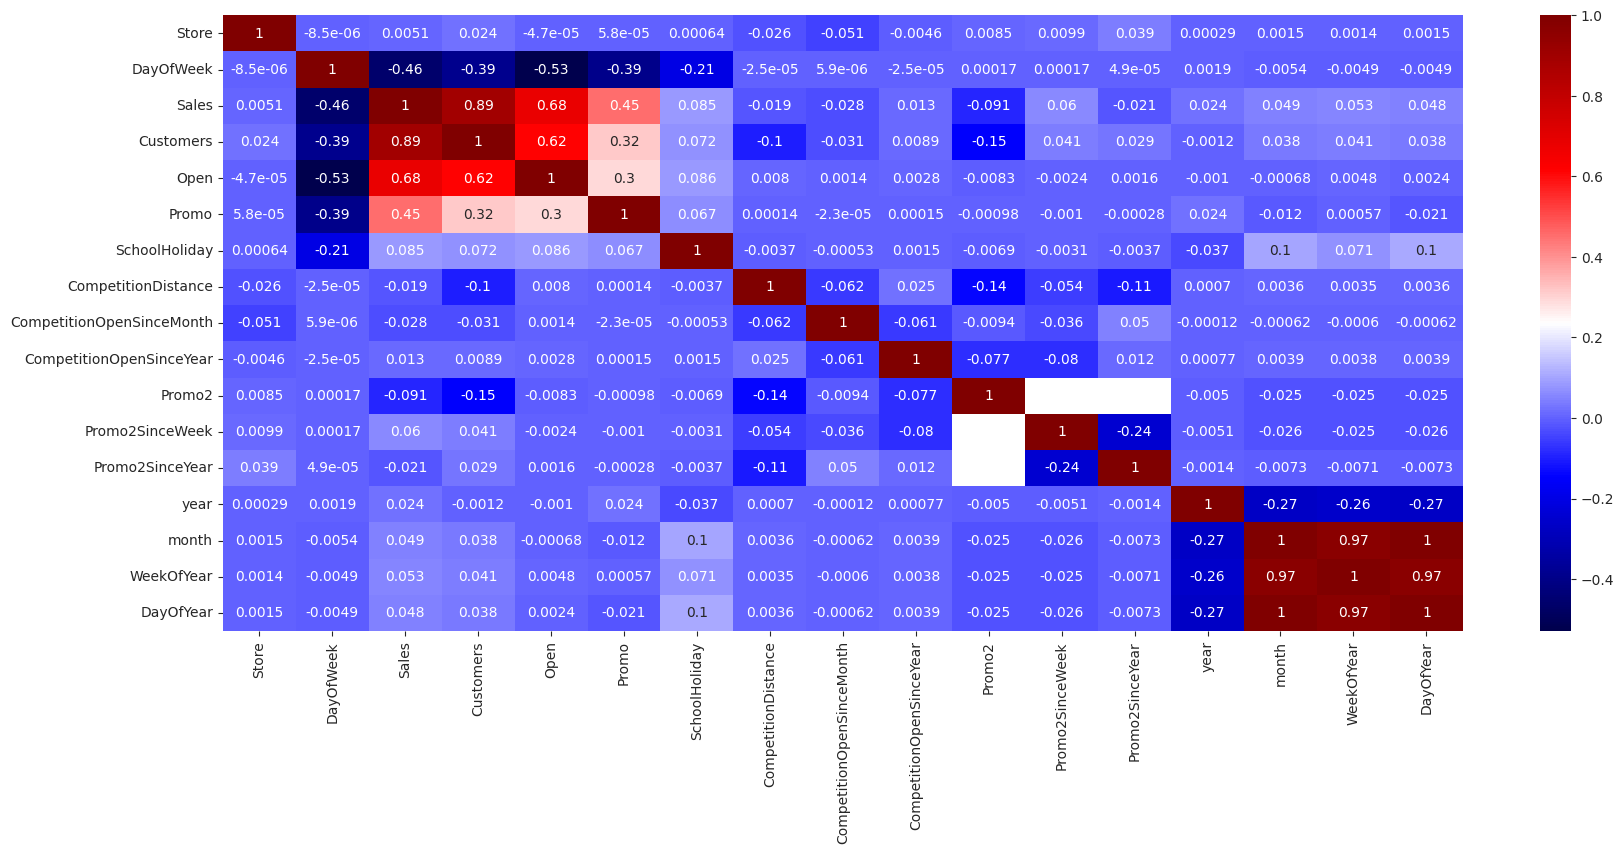

In [59]:
# Correlation Heatmap visualization code
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), cmap='seismic', annot=True)

##### 1. Why did you pick the specific chart?

The correlation heatmap is a valuable tool as it visually represents the strength of the relationship between two variables. Correlation can take on positive or negative values.

Positive correlation occurs when two variables increase or decrease together.

Negative correlation occurs when one variable increases while the other decreases.

The correlation coefficient ranges from -1 to +1, where -1 indicates a strong negative correlation, +1 indicates a strong positive correlation, and 0 indicates no correlation.

##### 2. What is/are the insight(s) found from the chart?

The correlation heatmap reveals the following insights:

- Sales, Customers, Open, and Promo exhibit positive correlations with each other.
- Sales, Customers, Open, and Promo display negative correlations with the Day of Week variable.
- Open and Promo demonstrate a positive correlation with Customers.
- Sales and Customers show a positive correlation with Open, while the Day of Week variable exhibits a negative correlation with Open.
- The Day of Week variable has a negative correlation with Promo.
- Promo2SinceYear and Promo2SinceWeek exhibit a negative correlation coefficient of -0.24.

#### Chart - 15 - Pair Plot 

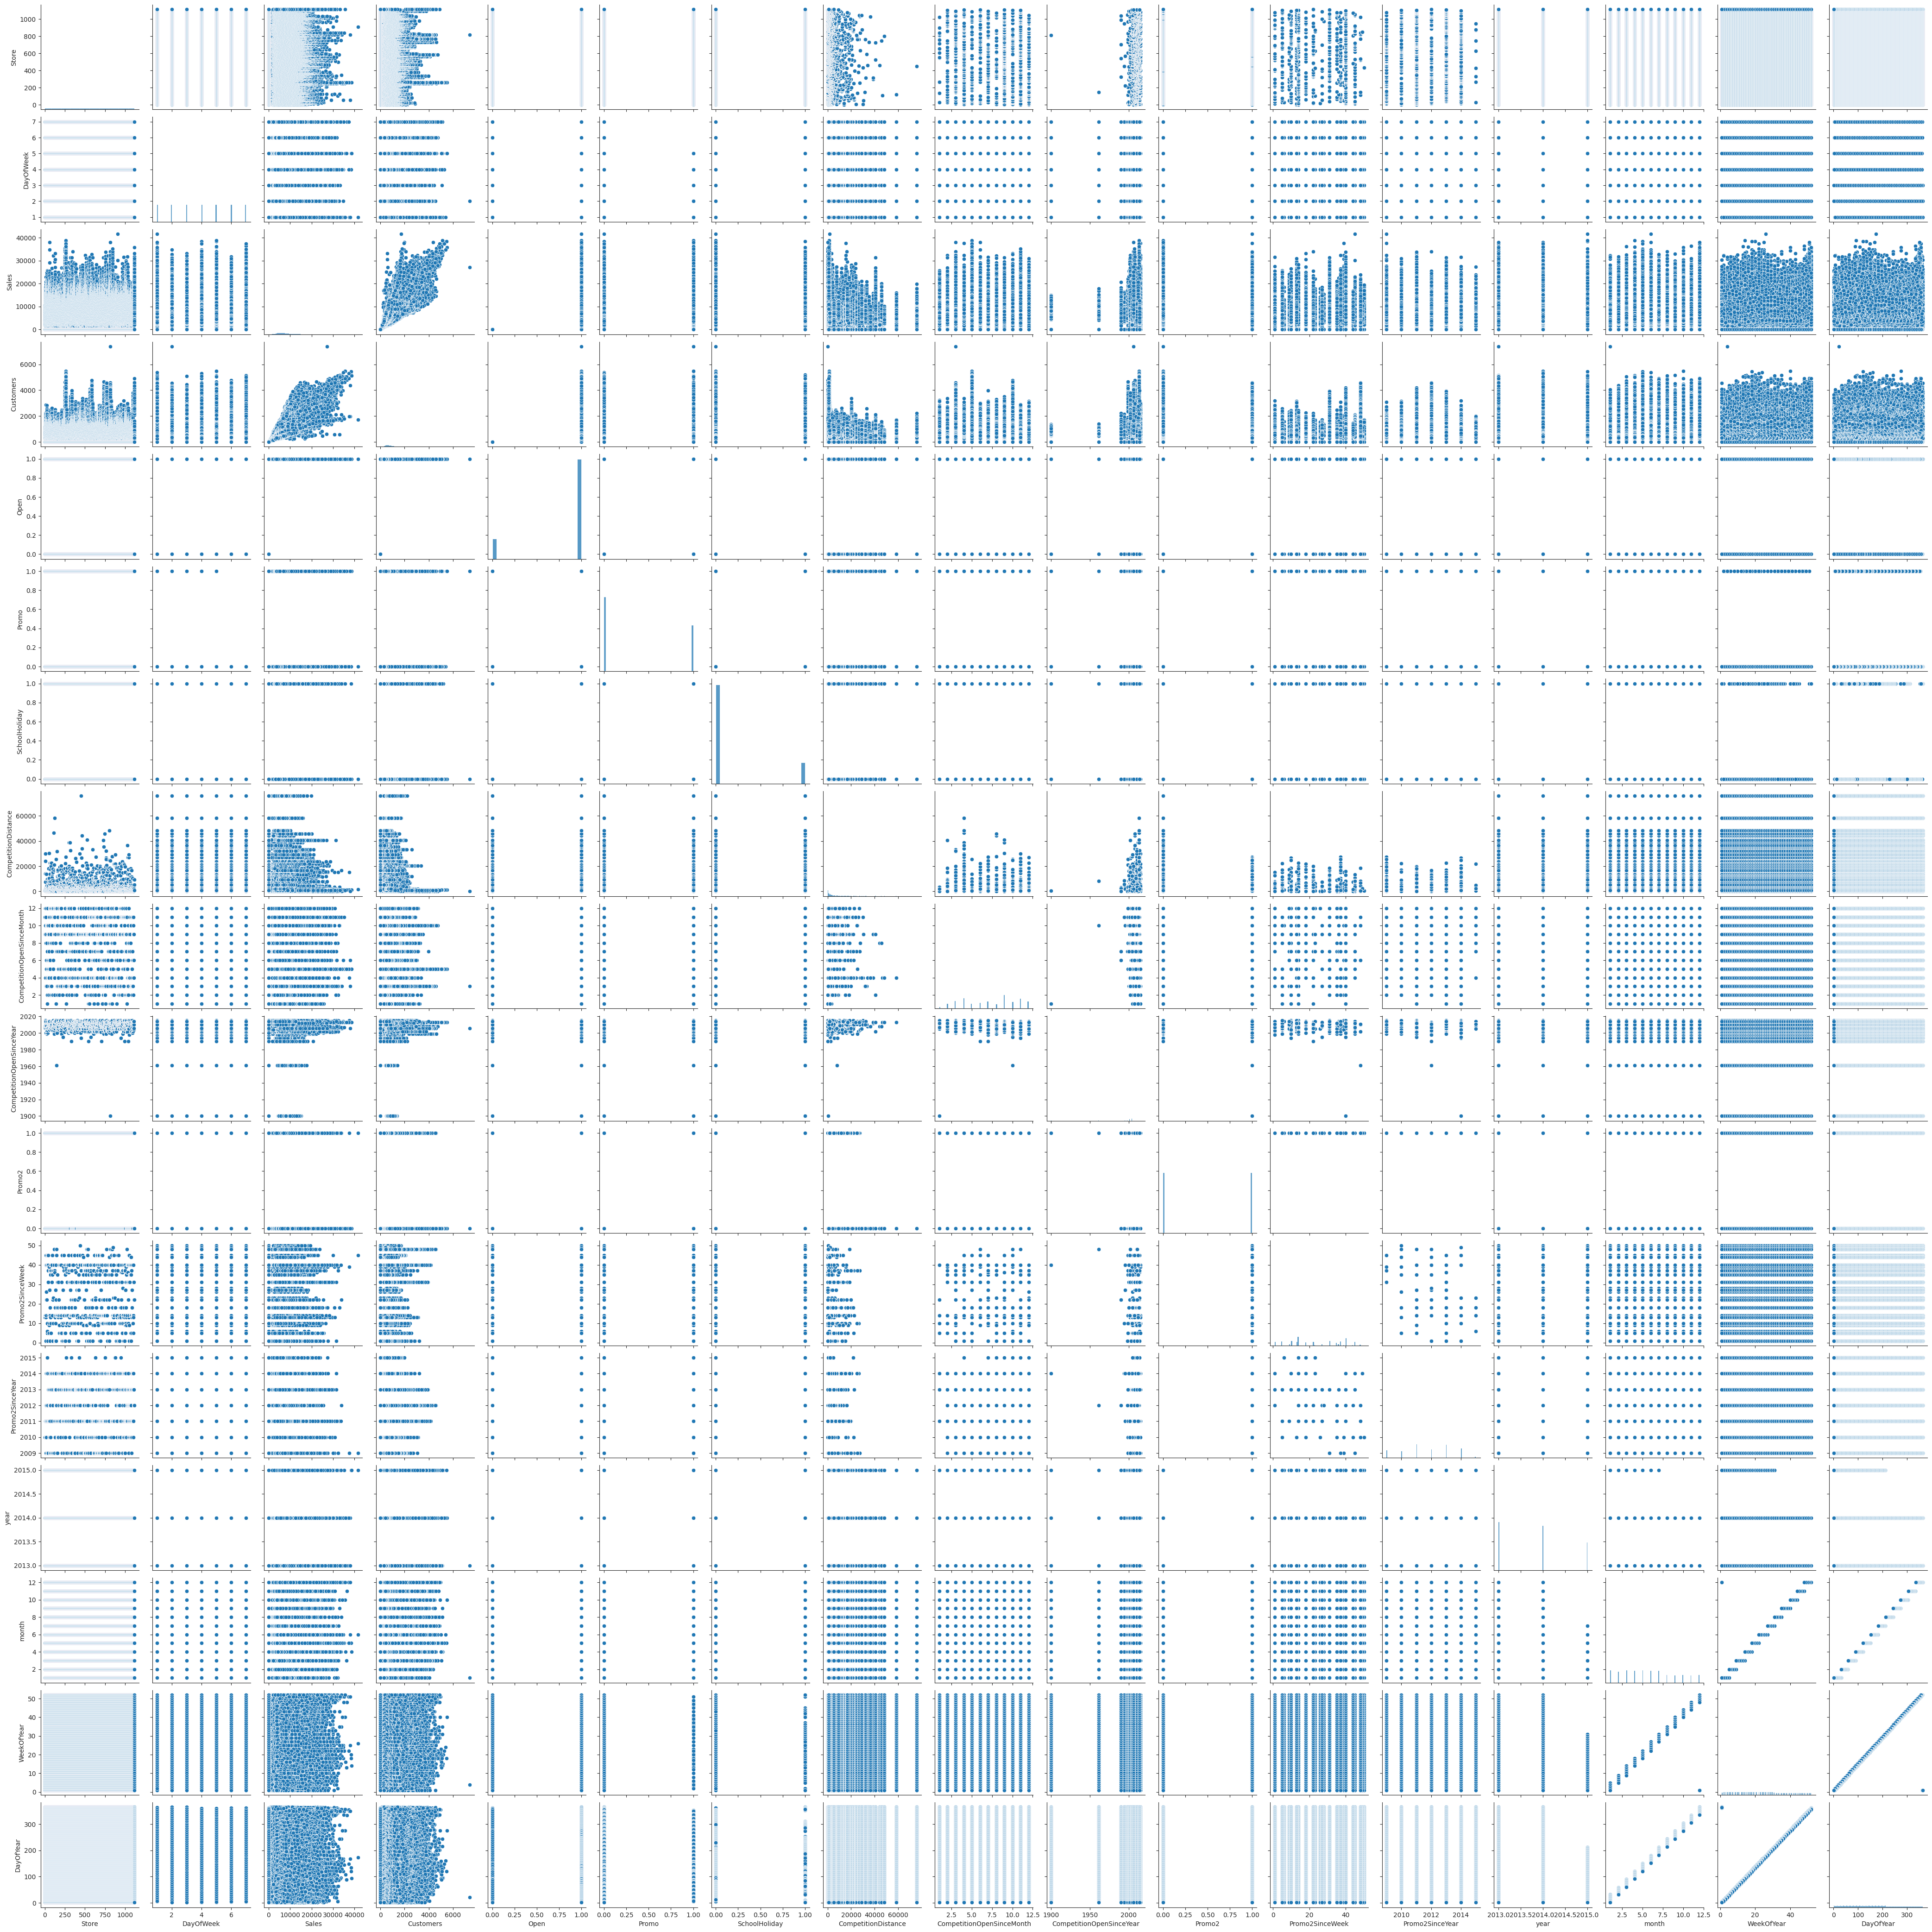

In [60]:
# Pair Plot visualization code
sns.pairplot(df)                                                                 #Using seaborn pairplot
plt.show()

##### 1. Why did you pick the specific chart?

The pair plot is employed to illustrate multiple pairwise bivariate distributions within a dataset. It visually represents the relationship between features using scatter plots. By examining the pair plot, we can observe how one variable changes in relation to another, enabling us to identify correlations between numerical features.

##### 2. What is/are the insight(s) found from the chart?

In the above plot, the following observations can be made:

There is a positive correlation between the number of customers and sales, indicating that as the number of customers increases, so does the sales.

The month and week of the year show a linear increase with the day of the year, suggesting a consistent pattern or trend throughout the year.

The pair plot provides a visual representation of the relationships between variables, allowing us to easily observe the behavior of each data point and identify any patterns or correlations.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.



1.   The distribution of the Sales data appears to be normal, indicating that the majority of the sales values are clustered around the mean, with fewer values deviating towards the tails of the distribution.
2.   The average sales in 2013 are equal to the average sales in 2014, suggesting that there was no significant difference in the average sales between these two years. This indicates a level of consistency in sales performance between the two years.



### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

1.  Null Hypothesis (No): The sales data follows a normal distribution.

2.  Alternate Hypothesis (Na): The sales data does not follow a normal distribution.

3.  Test Type: Shapiro-Wilk Test for normality.



#### 2. Perform an appropriate statistical test.

In [61]:
#Make a copy of our dataframe df for hypothesis testing
df_hypothesis = df.copy()

In [62]:
# Perform Statistical Test to obtain P-Value
#import scipy library
import scipy
#import shapiro method from scipy
from scipy.stats import shapiro

#Make a test dataframe for performing shapiro-wilk test
TestData = df_hypothesis["Sales"].sample(n=50000)

#Now, perform shapiro wilk-test
stat, p = shapiro(TestData)

print('stat = %.2f, p = %.35f' % (stat, p))

#Check p-value and make decision
if p > 0.05:
    print('Normal distribution')
else:
    print('Not normal distribution')

stat = 0.94, p = 0.00000000000000000000000000000000000
Not normal distribution


##### Which statistical test have you done to obtain P-Value?

We have performed Normality test by using Shapiro-Wilk Test. Using this we tests If data is normally distributed or not and found that the data is not normally distributed.

##### Why did you choose the specific statistical test?

The Shapiro-Wilk test is commonly used to assess the normality of a dataset in frequentist statistics. If the p-value obtained from the test is greater than 0.05, it suggests that the data follows a normal distribution. On the other hand, if the p-value is below 0.05, it indicates that the data significantly deviates from a normal distribution.

It is important to note that the Shapiro-Wilk test is just one of several methods available to assess normality. Other approaches, such as examining skewness and kurtosis values, can also be used to determine normality. For a more comprehensive analysis of normality, you may refer to our enhanced testing for normality guide.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (No) = 5658 - the mean sale of both the years 2013 and 2014 is equal.

Alternative Hypothesis (Na) > 5658 - the mean sale of 2014 is greater than that of the previous year.

Type of Test: Independent Sample T-test.

#### 2. Perform an appropriate statistical test.

In [64]:
# Perform Statistical Test to obtain P-Value
#Extract total sale of each year
yearly_sale = df_hypothesis.groupby(['year'])['Sales'].mean()                           #Grouping data by the 'year' column
yearly_sale

year
2013    5658.533675
2014    5833.290704
2015    5878.245380
Name: Sales, dtype: float64

In [ ]:
#Filter data with year == 2014
df_2014 = df_hypothesis[df_hypothesis['year']==2014].sample(n=50000)
#Now, extract sales
df_df_2014 = df_2014["Sales"].sample(n=50000)

#Filter data with year == 2013
df_2013 = df_hypothesis[df_hypothesis['year']==2013].sample(n=50000)
#Now, extract sales
df_df_2013 = df_2013["Sales"].sample(n=50000)

In [ ]:
#Assume: The meean or average sale of both the samples are equal 
#Null Hypothesis Ho = avg sale of both is equal
#Not Null hypothesis Ha = sale will be greater than last year 
stat, p = scipy.stats.ttest_ind(df_df_2013,df_df_2014)
print('stat=%.2f, p=%.35f' % (stat, p))
if p > 0.05:
  print("We can not reject null hypothesis, because p value is greater than 0.05")
else:
  print("We reject the null hypothesis, because p value is less than or equal to 0.05")

stat=-7.50, p=0.000000000000062015639327911347
we reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

We performed an Independent Sample T-test to obtain the P-value, which is used to compare the means of two samples. We utilized the ttest library from scipy to conduct this test.

As the obtained P-value is less than 0.05, we reject the null hypothesis. Therefore, our assumption holds true that the average sale of 2014 is greater than the previous year.

##### Why did you choose the specific statistical test?

The Independent Sample T-test is employed to compare the mean values of two samples and determine whether there is statistical evidence supporting significant differences or similarities in the associated population means. In our case, we have the sales data for two different years, and we already know the mean values for each year. This knowledge makes it straightforward to compare the sales figures between the two years, thereby facilitating the use of the Independent Sample T-test.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [66]:
#Extract null values available in our given dataset.
df_hypothesis.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
WeekOfYear                        0
DayOfYear                         0
dtype: int64

Hence, the 'CompetitionDistance' is a numerical column so, we check for the skewness of the data before treating null values.


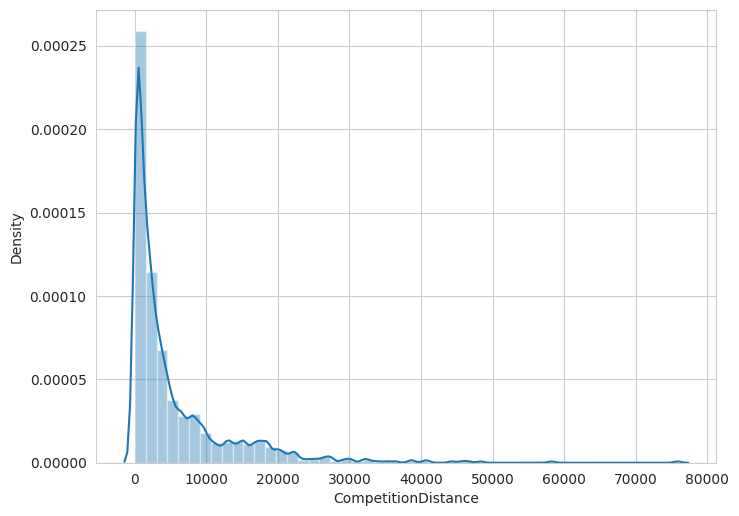

In [ ]:
# sns.displot(store_data['CompetitionDistance']) # Check the distribution of 'CompetitionDistance' or its skewness
sns.distplot(df['CompetitionDistance'])


In [ ]:
df['CompetitionDistance'].skew()

2.9285340174784116

In [ ]:
# Handling Missing Values & Missing Value Imputation
df['CompetitionDistance'].fillna(df['CompetitionDistance'].median(),inplace=True) # Replace the null value with median because it is skewed


Now, check the distrbution of "CompetitionOpenSinceMonth" and "CompetitionOpenSinceYear".

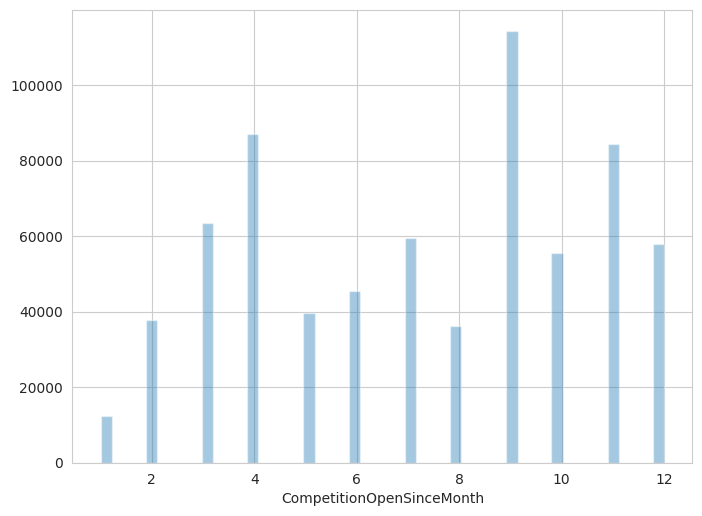

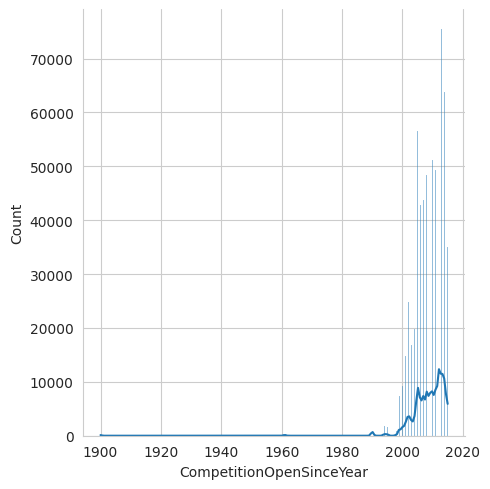

In [ ]:
sns.distplot(df['CompetitionOpenSinceMonth'],kde=False) #check the distribution of 'CompetitionOpenSinceMonth'
sns.displot(df['CompetitionOpenSinceYear'],kde=True) #check the distribution of 'CompetitionOpenSinceYear'

In [ ]:
# Hence 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' are categorical data so, replace the null values with mode
df['CompetitionOpenSinceMonth'].fillna(df['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
df['CompetitionOpenSinceYear'].fillna(df['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [ ]:
#Here, Promo2SinceWeek, Promo2SinceYear, PromoInterval are null so, replace nan value with 0
df['Promo2SinceWeek'].fillna(value=0,inplace=True)
df['Promo2SinceYear'].fillna(value=0,inplace=True)
df['PromoInterval'].fillna(value=0,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

#### What all missing value imputation techniques have you used and why did you use those techniques?

'CompetitionDistance' shows an positive or right skewed data so, we replace the null values with the median because the median is not affected by the outliers.

'CompetitionOpenSinceMonth' and 'CompetitionOpenSinceYear' both are categorical features so, we replaced the null values with the mode.

In 'Promo2SinceWeek', 'Promo2SinceYear', and 'PromoInterval' missing values represent that there are no promo2 (promo in consecutive month) in the particular date. So, we replace the null value with zero.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
df['Sales'].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

Total number of Outliers present in the Sales column are 9731.


[Text(0.5, 1.0, 'Outliers Distribution')]

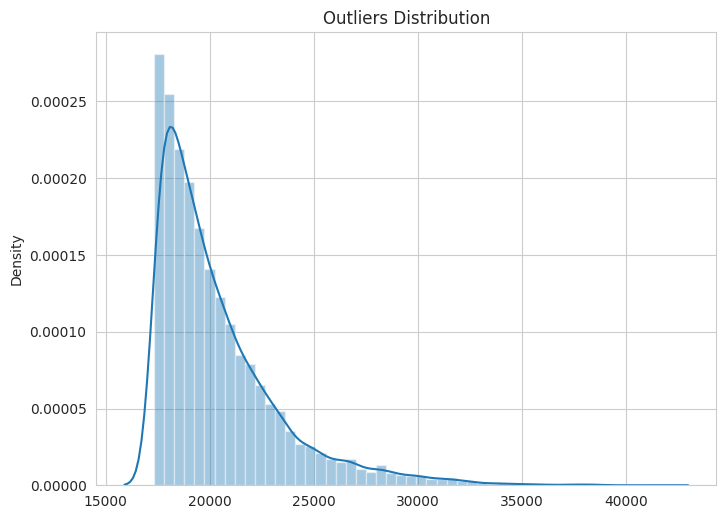

In [ ]:
#code to seperate outliers
mean = np.mean(df['Sales']) #mean
std = np.std(df['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df['Sales']:
    z_score = (value-mean)/std
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [ ]:
max(outliers)

41551

In [ ]:
min(outliers)

17325

In [ ]:
#percentage of sales greater than 10.2
sales_outliers = df.loc[df['Sales']> min(outliers)]
percentage_of_outliers = (len(sales_outliers)/len(df))*100
#print
print(f'The percentage of observations of sales greater than {min(outliers)} are {percentage_of_outliers}')

The percentage of observations of sales greater than 17325 are 0.9563423052686321


In [ ]:
df.loc[df['Sales']> min(outliers)]

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
3404         4          1 2013-12-30  17412       2216     1      0   
6244         7          1 2013-12-16  18413       1490     1      1   
6384         7          1 2013-07-29  17567       1622     1      1   
9648        11          1 2014-12-15  17724       1788     1      1   
10005       11          1 2013-12-23  22822       2849     1      0   
...        ...        ...        ...    ...        ...   ...    ...   
1016260   1114          1 2013-01-07  21237       2962     1      1   
1016262   1114          6 2013-01-05  18856       3065     1      0   
1016263   1114          5 2013-01-04  18371       3036     1      0   
1016264   1114          4 2013-01-03  18463       3211     1      0   
1016265   1114          3 2013-01-02  20642       3401     1      0   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
3404               0              1         c  ...                       9.0   
6244               0              0         a  ...                       4.0   
6384               0              1         a  ...                       4.0   
9648               0              0         a  ...                      11.0   
10005              0              1         a  ...                      11.0   
...              ...            ...       ...  ...                       ...   
1016260            0              0         a  ...                       9.0   
1016262            0              0         a  ...                       9.0   
1016263            0              1         a  ...                       9.0   
1016264            0              1         a  ...                       9.0   
1016265            0              1         a  ...                       9.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
3404                       2009.0       0              0.0              0.0   
6244                       2013.0       0              0.0              0.0   
6384                       2013.0       0              0.0              0.0   
9648                       2011.0       1              1.0           2012.0   
10005                      2011.0       1              1.0           2012.0   
...                           ...     ...              ...              ...   
1016260                    2013.0       0              0.0              0.0   
1016262                    2013.0       0              0.0              0.0   
1016263                    2013.0       0              0.0              0.0   
1016264                    2013.0       0              0.0              0.0   
1016265                    2013.0       0              0.0              0.0   

           PromoInterval  year month  WeekOfYear  DayOfYear  
3404                   0  2013    12           1        364  
6244                   0  2013    12          51        350  
6384                   0  2013     7          31        210  
9648     Jan,Apr,Jul,Oct  2014    12          51        349  
10005    Jan,Apr,Jul,Oct  2013    12          52        357  
...                  ...   ...   ...         ...        ...  
1016260                0  2013     1           2          7  
1016262                0  2013     1           1          5  
1016263                0  2013     1           1          4  
1016264                0  2013     1           1          3  
1016265                0  2013     1           1          2  

[9728 rows x 22 columns]

In [ ]:
#exploring the reasons behind this behaviour
sales_outliers.reset_index(drop=True)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0         4          1 2013-12-30  17412       2216     1      0            0   
1         7          1 2013-12-16  18413       1490     1      1            0   
2         7          1 2013-07-29  17567       1622     1      1            0   
3        11          1 2014-12-15  17724       1788     1      1            0   
4        11          1 2013-12-23  22822       2849     1      0            0   
...     ...        ...        ...    ...        ...   ...    ...          ...   
9723   1114          1 2013-01-07  21237       2962     1      1            0   
9724   1114          6 2013-01-05  18856       3065     1      0            0   
9725   1114          5 2013-01-04  18371       3036     1      0            0   
9726   1114          4 2013-01-03  18463       3211     1      0            0   
9727   1114          3 2013-01-02  20642       3401     1      0            0   

      SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
0                 1         c  ...                       9.0   
1                 0         a  ...                       4.0   
2                 1         a  ...                       4.0   
3                 0         a  ...                      11.0   
4                 1         a  ...                      11.0   
...             ...       ...  ...                       ...   
9723              0         a  ...                       9.0   
9724              0         a  ...                       9.0   
9725              1         a  ...                       9.0   
9726              1         a  ...                       9.0   
9727              1         a  ...                       9.0   

      CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                       2009.0       0              0.0              0.0   
1                       2013.0       0              0.0              0.0   
2                       2013.0       0              0.0              0.0   
3                       2011.0       1              1.0           2012.0   
4                       2011.0       1              1.0           2012.0   
...                        ...     ...              ...              ...   
9723                    2013.0       0              0.0              0.0   
9724                    2013.0       0              0.0              0.0   
9725                    2013.0       0              0.0              0.0   
9726                    2013.0       0              0.0              0.0   
9727                    2013.0       0              0.0              0.0   

        PromoInterval  year month  WeekOfYear  DayOfYear  
0                   0  2013    12           1        364  
1                   0  2013    12          51        350  
2                   0  2013     7          31        210  
3     Jan,Apr,Jul,Oct  2014    12          51        349  
4     Jan,Apr,Jul,Oct  2013    12          52        357  
...               ...   ...   ...         ...        ...  
9723                0  2013     1           2          7  
9724                0  2013     1           1          5  
9725                0  2013     1           1          4  
9726                0  2013     1           1          3  
9727                0  2013     1           1          2  

[9728 rows x 22 columns]

In [ ]:
#lets see the sales when there is promo

sales_outliers[sales_outliers['Promo']==1]

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
6244         7          1 2013-12-16  18413       1490     1      1   
6384         7          1 2013-07-29  17567       1622     1      1   
9648        11          1 2014-12-15  17724       1788     1      1   
10008       11          5 2013-12-20  17565       2144     1      1   
10010       11          3 2013-12-18  19659       2247     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1016246   1114          1 2013-01-21  18918       2642     1      1   
1016256   1114          5 2013-01-11  20214       2898     1      1   
1016257   1114          4 2013-01-10  18075       2641     1      1   
1016259   1114          2 2013-01-08  18816       2588     1      1   
1016260   1114          1 2013-01-07  21237       2962     1      1   

        StateHoliday  SchoolHoliday StoreType  ... CompetitionOpenSinceMonth  \
6244               0              0         a  ...                       4.0   
6384               0              1         a  ...                       4.0   
9648               0              0         a  ...                      11.0   
10008              0              0         a  ...                      11.0   
10010              0              0         a  ...                      11.0   
...              ...            ...       ...  ...                       ...   
1016246            0              0         a  ...                       9.0   
1016256            0              0         a  ...                       9.0   
1016257            0              0         a  ...                       9.0   
1016259            0              0         a  ...                       9.0   
1016260            0              0         a  ...                       9.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
6244                       2013.0       0              0.0              0.0   
6384                       2013.0       0              0.0              0.0   
9648                       2011.0       1              1.0           2012.0   
10008                      2011.0       1              1.0           2012.0   
10010                      2011.0       1              1.0           2012.0   
...                           ...     ...              ...              ...   
1016246                    2013.0       0              0.0              0.0   
1016256                    2013.0       0              0.0              0.0   
1016257                    2013.0       0              0.0              0.0   
1016259                    2013.0       0              0.0              0.0   
1016260                    2013.0       0              0.0              0.0   

           PromoInterval  year month  WeekOfYear  DayOfYear  
6244                   0  2013    12          51        350  
6384                   0  2013     7          31        210  
9648     Jan,Apr,Jul,Oct  2014    12          51        349  
10008    Jan,Apr,Jul,Oct  2013    12          51        354  
10010    Jan,Apr,Jul,Oct  2013    12          51        352  
...                  ...   ...   ...         ...        ...  
1016246                0  2013     1           4         21  
1016256                0  2013     1           2         11  
1016257                0  2013     1           2         10  
1016259                0  2013     1           2          8  
1016260                0  2013     1           2          7  

[6995 rows x 22 columns]

In [ ]:
df.shape

(1017209, 22)

##### What all outlier treatment techniques have you used and why did you use those techniques?

There are only 0.95% (approx) outliers present in the data. 

Here, the number of sales outliers is 9728, in which 6995 observations is present in the dataframe when the store is running a promo. So, it will not be a good idea to treat outliers. 

So, we will not drop any observation for further pre-processing.

### 3. Categorical Encoding

In [ ]:
#convert the object type of 'StateHoliday' data into numerical as follows
df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [ ]:
# Defining a function to check whether the sale month is present in the promointerval or not. if yes return 1 else 0
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',') # ['Jun', 'JULY',"AUG"]

    if month_dict[df['month']] in months: # df['Month'] ==7
      return 1
    else:
      return 0
  except Exception:
    return 0

In [ ]:
df['Promo2running'] = df.apply(promo2running, axis=1) # create a feature called Promo2running which defines whether the promointerval is present in the sale moth

In [ ]:
df.Promo2running.value_counts()

0    842417
1    174792
Name: Promo2running, dtype: int64

In [ ]:
df.drop(['PromoInterval'],axis=1,inplace=True)

In [ ]:
df=pd.get_dummies(columns = ['StoreType' , 'Assortment'] ,data = df ,drop_first = True)

In [ ]:
df.head(1)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   

   SchoolHoliday  CompetitionDistance  ...  year  month  WeekOfYear  \
0              1               1270.0  ...  2015      7          31   

   DayOfYear  Promo2running  StoreType_b  StoreType_c  StoreType_d  \
0        212              0            0            1            0   

   Assortment_b  Assortment_c  
0             0             0  

[1 rows x 25 columns]

#### What all categorical encoding techniques have you used & why did you use those techniques?

In 'StateHoliday' Column, there are different types of hildays so, we replaced all holidays with 1.

There are three categorical column present in the dataframe (i.e 'StoreType' , 'Assortment', and 'PromoInterval'). Now, we created a column called 'promo2running' which is 1 if sale month is present in the promointerval month else 0.

We changed two categorical columns (i.e 'StoreType' and 'Assortment') into numerical ones by creating the dummy variables.


### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features



#We need to combine 'Promo2SinceYear' and 'Promo2SinceWeek' into a single column
df['Promo2Open'] = (df['year'] - df['Promo2SinceYear'])*12 + (df['WeekOfYear'] - df['Promo2SinceWeek'])*0.230137  # Here, 1 week = 0.230137 month

#correcting the neg values
df['Promo2Open'] = df['Promo2Open'].apply(lambda x:0 if x < 0 else x)
#Dropping unecessary columns
df.drop(['Promo2SinceYear','Promo2SinceWeek'],axis=1,inplace=True)


Here, we converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running.
We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.


In [ ]:
# Check for the data where 'Promo2Open' is less than zero.
df[df['Promo2Open']<0]

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, year, month, WeekOfYear, DayOfYear, Promo2running, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, Promo2Open]
Index: []

[0 rows x 24 columns]

In [ ]:
#combining competition open since month and year into total months
df['CompetitionOpen'] = (df['year'] - df['CompetitionOpenSinceYear'])*12 + (df['month'] - df['CompetitionOpenSinceMonth'])
#correcting the neg values
df['CompetitionOpen'] = df['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

Here, we are combining 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running.
We did the same thing as we did above.
After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

In [ ]:
df[df['CompetitionOpen']<0]

Empty DataFrame
Columns: [Store, DayOfWeek, Date, Sales, Customers, Open, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, Promo2, year, month, WeekOfYear, DayOfYear, Promo2running, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, Promo2Open, CompetitionOpen]
Index: []

[0 rows x 23 columns]

In [ ]:
df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance', 'Promo2',
       'year', 'month', 'WeekOfYear', 'DayOfYear', 'Promo2running',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   Store                1017209 non-null  int64         
 1   DayOfWeek            1017209 non-null  int64         
 2   Date                 1017209 non-null  datetime64[ns]
 3   Sales                1017209 non-null  int64         
 4   Customers            1017209 non-null  int64         
 5   Open                 1017209 non-null  int64         
 6   Promo                1017209 non-null  int64         
 7   StateHoliday         1017209 non-null  int64         
 8   SchoolHoliday        1017209 non-null  int64         
 9   CompetitionDistance  1017209 non-null  float64       
 10  Promo2               1017209 non-null  int64         
 11  year                 1017209 non-null  int64         
 12  month                1017209 non-null  int64         
 1

In [ ]:
df.head(2)

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1             0   
1      1          4 2015-07-30   5020        546     1      1             0   

   SchoolHoliday  CompetitionDistance  ...  WeekOfYear  DayOfYear  \
0              1               1270.0  ...          31        212   
1              1               1270.0  ...          31        211   

   Promo2running  StoreType_b  StoreType_c  StoreType_d  Assortment_b  \
0              0            0            1            0             0   
1              0            0            1            0             0   

   Assortment_c    Promo2Open  CompetitionOpen  
0             0  24187.134247             82.0  
1             0  24187.134247             82.0  

[2 rows x 23 columns]

#### 2. Feature Selection

In [ ]:
df2=df.copy()

Here, we coopied the data into a different variable so that if any mistake happen during the execution of code we need not to run all the cells from the beginning.

In [ ]:
df2.Sales.values

array([5263, 5020, 4782, ..., 4297, 3697,    0])

In [ ]:
df2.shape

(1017209, 23)

In [ ]:
df2=df[df['Open']==1] # Remove the rows when store is closed

In [ ]:
df2.shape

(844392, 23)

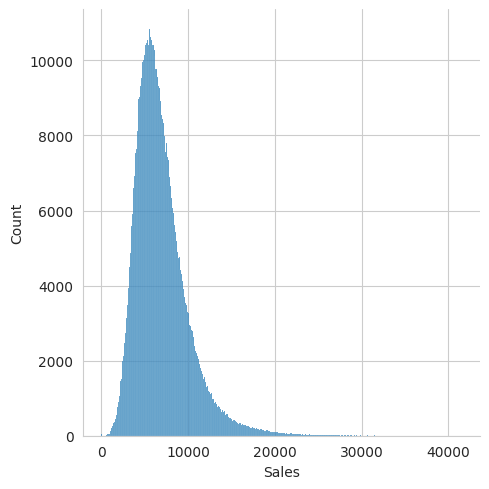

In [ ]:
sns.displot(x=df2.Sales)

In [ ]:
## transformation

df2['Sales'] = np.sqrt(df2['Sales'])

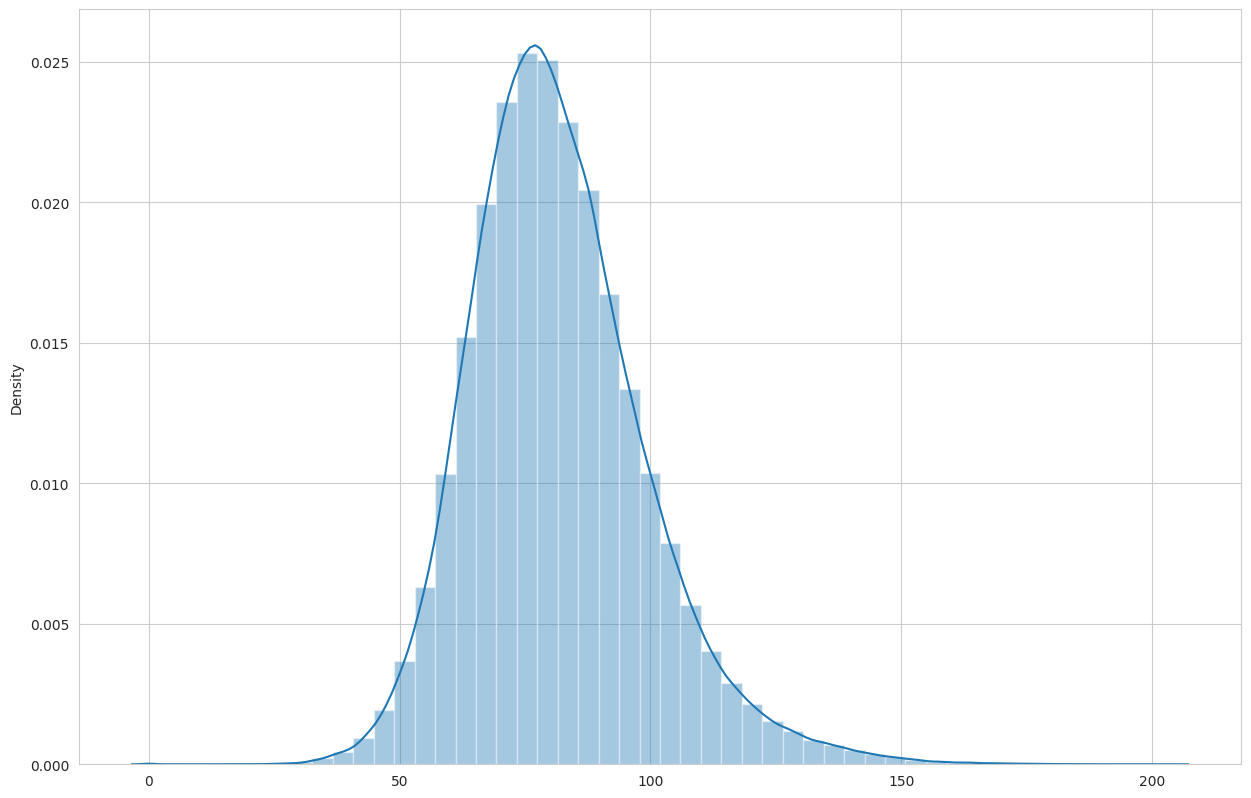

In [ ]:
plt.figure(figsize=(15,10))

sns.distplot(x=df2['Sales'])

In [ ]:
df2.tail()

Store  DayOfWeek       Date      Sales  Customers  Open  Promo  \
1017202   1115          1 2013-01-07  83.096330        471     1      1   
1017204   1115          6 2013-01-05  69.072426        339     1      0   
1017205   1115          5 2013-01-04  67.379522        326     1      0   
1017206   1115          4 2013-01-03  65.551506        300     1      0   
1017207   1115          3 2013-01-02  60.802960        305     1      0   

         StateHoliday  SchoolHoliday  CompetitionDistance  ...  WeekOfYear  \
1017202             0              1               5350.0  ...           2   
1017204             0              1               5350.0  ...           1   
1017205             0              1               5350.0  ...           1   
1017206             0              1               5350.0  ...           1   
1017207             0              1               5350.0  ...           1   

         DayOfYear  Promo2running  StoreType_b  StoreType_c  StoreType_d  \
1017202          7              0            0            0            1   
1017204          5              0            0            0            1   
1017205          4              0            0            0            1   
1017206          3              0            0            0            1   
1017207          2              0            0            0            1   

         Assortment_b  Assortment_c  Promo2Open  CompetitionOpen  
1017202             0             1    7.397260              0.0  
1017204             0             1    7.167123              0.0  
1017205             0             1    7.167123              0.0  
1017206             0             1    7.167123              0.0  
1017207             0             1    7.167123              0.0  

[5 rows x 23 columns]

In [ ]:
df2.Sales.min()

0.0

In [ ]:
df2[df2['Sales']==0]

Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
22589       25          4 2014-02-13    0.0          0     1      0   
22590       25          3 2014-02-12    0.0          0     1      0   
25212       28          4 2014-09-04    0.0          0     1      1   
25213       28          3 2014-09-03    0.0          0     1      1   
25214       28          2 2014-09-02    0.0          0     1      1   
51491       57          2 2014-07-01    0.0          0     1      1   
92570      102          4 2014-07-24    0.0          0     1      0   
92582      102          6 2014-07-12    0.0          0     1      0   
205303     227          4 2014-09-11    0.0          0     1      0   
210424     232          4 2013-01-24    0.0          0     1      1   
215530     238          4 2014-07-24    0.0          0     1      0   
235476     259          4 2013-02-07    0.0          0     1      1   
274736     303          4 2014-07-24    0.0          0     1      0   
297110     327          3 2014-03-12    0.0          0     1      0   
308819     339          4 2013-01-31    0.0          0     1      0   
308820     339          3 2013-01-30    0.0          0     1      0   
321411     353          6 2013-03-16    0.0          0     1      0   
324624     357          1 2014-09-22    0.0          0     1      0   
331720     364          3 2013-05-08    0.0          0     1      0   
331721     364          2 2013-05-07    0.0          0     1      0   
352576     387          4 2014-07-24    0.0          0     1      0   
356674     391          3 2013-08-28    0.0          0     1      1   
499043     548          5 2014-09-05    0.0          0     1      1   
537239     589          1 2013-04-29    0.0          0     1      1   
567892     623          6 2014-01-25    0.0          0     1      0   
567893     623          5 2014-01-24    0.0          0     1      1   
601963     661          5 2014-04-04    0.0          0     1      1   
604061     663          1 2013-09-02    0.0          0     1      0   
606010     665          6 2013-06-29    0.0          0     1      0   
606011     665          5 2013-06-28    0.0          0     1      0   
613301     674          4 2015-03-26    0.0          0     1      0   
620396     681          5 2013-05-10    0.0          0     1      0   
636348     699          4 2015-02-05    0.0          0     1      1   
637900     700          3 2013-06-05    0.0          0     1      1   
644401     708          3 2014-10-01    0.0          0     1      1   
694235     762          4 2013-01-17    0.0          0     1      0   
760375     835          4 2014-09-11    0.0          0     1      0   
760376     835          3 2014-09-10    0.0          0     1      0   
774487     850          6 2014-03-29    0.0          0     1      0   
803779     882          3 2014-07-23    0.0          0     1      0   
808305     887          3 2014-07-23    0.0          0     1      0   
842281     925          4 2014-07-03    0.0          0     1      1   
844494     927          4 2013-08-08    0.0          0     1      0   
864013     948          4 2013-04-25    0.0          5     1      1   
884745     971          5 2015-05-15    0.0          0     1      0   
896163     983          6 2014-01-18    0.0          0     1      0   
896164     983          5 2014-01-17    0.0          0     1      0   
898930     986          2 2014-03-18    0.0          0     1      1   
927132    1017          4 2014-06-05    0.0          0     1      1   
927133    1017          3 2014-06-04    0.0          0     1      1   
947634    1039          3 2013-07-10    0.0          0     1      0   
947635    1039          2 2013-07-09    0.0          0     1      0   
1003330   1100          3 2014-04-30    0.0          0     1      1   
1003331   1100          2 2014-04-29    0.0          3     1      1   

         StateHoliday  SchoolHoliday  CompetitionDistance  ...  WeekOfYear  \
22589               0    

In [ ]:
# Select your features wisely to avoid overfitting

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    # Removing non-finite values
    df = df.dropna()
    # Removing non-numeric columns
    df = df.select_dtypes(include=['float64', 'int64'])
    # Creating a dataframe to store the VIF values
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

In [ ]:
vif_df = calc_vif(df2)
print(vif_df)

              variables           VIF
0                 Store  1.003863e+00
1             DayOfWeek  1.122128e+00
2                 Sales  3.551925e+00
3             Customers  3.257617e+00
4                  Open  7.424286e+06
5                 Promo  1.344774e+00
6          StateHoliday  1.005410e+00
7         SchoolHoliday  1.036277e+00
8   CompetitionDistance  1.087744e+00
9                Promo2  9.302019e+05
10                 year  1.587498e+00
11                month  1.383249e+02
12            DayOfYear  1.383396e+02
13        Promo2running  1.268155e+00
14           Promo2Open  9.302158e+05
15      CompetitionOpen  1.015548e+00


In [ ]:
columns_to_drop = ['Store', 'year', 'WeekOfYear', 'DayOfYear','Open','Promo2running'] 
new_df = df2.drop(columns = columns_to_drop, axis =1)


In [ ]:
new_df.head()

DayOfWeek       Date      Sales  Customers  Promo  StateHoliday  \
0          5 2015-07-31  72.546537        555      1             0   
1          4 2015-07-30  70.851958        546      1             0   
2          3 2015-07-29  69.152006        523      1             0   
3          2 2015-07-28  70.788417        560      1             0   
4          1 2015-07-27  78.115299        612      1             0   

   SchoolHoliday  CompetitionDistance  Promo2  month  StoreType_b  \
0              1               1270.0       0      7            0   
1              1               1270.0       0      7            0   
2              1               1270.0       0      7            0   
3              1               1270.0       0      7            0   
4              1               1270.0       0      7            0   

   StoreType_c  StoreType_d  Assortment_b  Assortment_c    Promo2Open  \
0            1            0             0             0  24187.134247   
1            1            0             0             0  24187.134247   
2            1            0             0             0  24187.134247   
3            1            0             0             0  24187.134247   
4            1            0             0             0  24187.134247   

   CompetitionOpen  
0             82.0  
1             82.0  
2             82.0  
3             82.0  
4             82.0

In [ ]:
new_df.shape

(844392, 17)

In [ ]:
new_df.Sales.min()

0.0

In [ ]:
new_df.Sales.max()

203.84062401788316

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

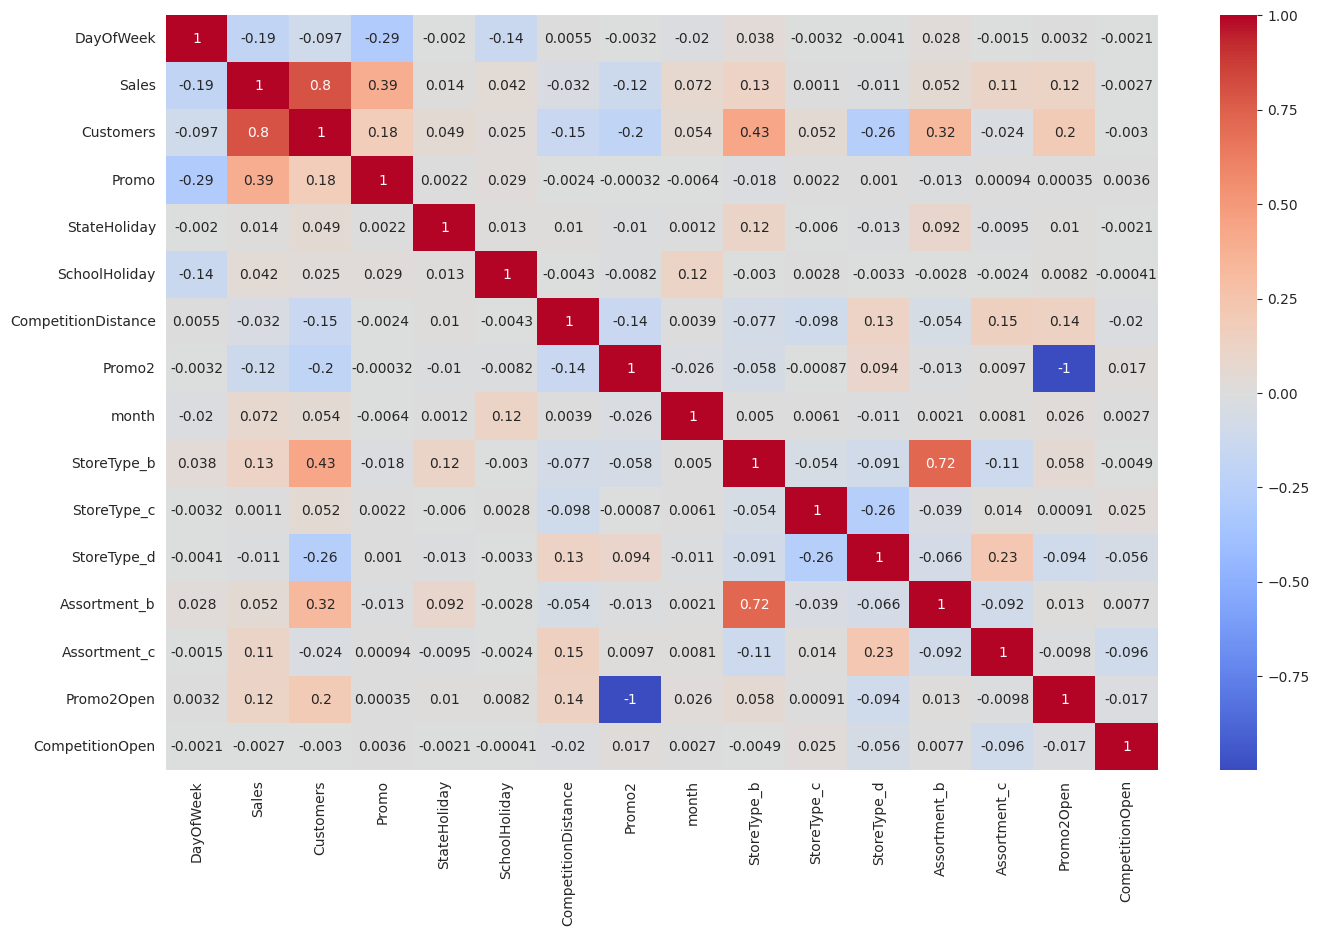

In [ ]:
#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(new_df.corr(), cmap="coolwarm", annot=True)

##### What all feature selection methods have you used  and why?

Here, we removed four columns (i.e ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date']) from our dataset which is irrelavant for our models. Because we will not give these input variables to ML model for sales prediction.

We converted two columns into a single one because 'Promo2SinceYear' and 'Promo2SinceWeek' represents that since when the promo2 is running. We created a column 'Promo2Open' which defines the number of month since the promo2 is running.

We dropped 'Promo2SinceYear' and 'Promo2SinceWeek' columns from the dataset becaused we created 'Promo2Open' by using them.

We are combined 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' into 'CompetitionOpen', and 'CompetitionOpen' depicts since how many months the competition store is running. We did the same thing as we did above. After combining both columns 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth', we dropped these columns from dataset.

##### Which all features you found important and why?

we removed four columns (i.e ['Store', 'year', 'WeekOfYear', 'DayOfYear', 'Date']) from our dataset which is irrelavant for our models. Because we will not give these input variables to ML model for sales prediction.

Sales is our target variable and rest are the independent variables or we can say that these are the features which influencing the target variables.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
#CompetitionDistance, month, Promo2Open,CompetitionOpen
new_df['CompetitionDistance'] = new_df['CompetitionDistance'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['Promo2Open'] = new_df['Promo2Open'].map(lambda x : np.log(x) if x != 0 else 0)
new_df['CompetitionOpen'] = new_df['CompetitionOpen'].map(lambda x : np.log(x) if x != 0 else 0)

In [ ]:
new_df.head()

DayOfWeek       Date      Sales  Customers  Promo  StateHoliday  \
0          5 2015-07-31  72.546537        555      1             0   
1          4 2015-07-30  70.851958        546      1             0   
2          3 2015-07-29  69.152006        523      1             0   
3          2 2015-07-28  70.788417        560      1             0   
4          1 2015-07-27  78.115299        612      1             0   

   SchoolHoliday  CompetitionDistance  Promo2  month  StoreType_b  \
0              1             7.146772       0      7            0   
1              1             7.146772       0      7            0   
2              1             7.146772       0      7            0   
3              1             7.146772       0      7            0   
4              1             7.146772       0      7            0   

   StoreType_c  StoreType_d  Assortment_b  Assortment_c  Promo2Open  \
0            1            0             0             0   10.093576   
1            1            0             0             0   10.093576   
2            1            0             0             0   10.093576   
3            1            0             0             0   10.093576   
4            1            0             0             0   10.093576   

   CompetitionOpen  
0         4.406719  
1         4.406719  
2         4.406719  
3         4.406719  
4         4.406719

In [ ]:
# new_df[new_df['Promo2Open']<0 ]
# new_df[new_df['CompetitionOpen']<0 ]
new_df[new_df['CompetitionDistance']<0 ]

Empty DataFrame
Columns: [DayOfWeek, Date, Sales, Customers, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, Promo2, month, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, Promo2Open, CompetitionOpen]
Index: []

In [ ]:
new_df=new_df[new_df['Promo2Open']>0]
new_df

DayOfWeek       Date      Sales  Customers  Promo  StateHoliday  \
0                5 2015-07-31  72.546537        555      1             0   
1                4 2015-07-30  70.851958        546      1             0   
2                3 2015-07-29  69.152006        523      1             0   
3                2 2015-07-28  70.788417        560      1             0   
4                1 2015-07-27  78.115299        612      1             0   
...            ...        ...        ...        ...    ...           ...   
1017202          1 2013-01-07  83.096330        471      1             0   
1017204          6 2013-01-05  69.072426        339      0             0   
1017205          5 2013-01-04  67.379522        326      0             0   
1017206          4 2013-01-03  65.551506        300      0             0   
1017207          3 2013-01-02  60.802960        305      0             0   

         SchoolHoliday  CompetitionDistance  Promo2  month  StoreType_b  \
0                    1             7.146772       0      7            0   
1                    1             7.146772       0      7            0   
2                    1             7.146772       0      7            0   
3                    1             7.146772       0      7            0   
4                    1             7.146772       0      7            0   
...                ...                  ...     ...    ...          ...   
1017202              1             8.584852       1      1            0   
1017204              1             8.584852       1      1            0   
1017205              1             8.584852       1      1            0   
1017206              1             8.584852       1      1            0   
1017207              1             8.584852       1      1            0   

         StoreType_c  StoreType_d  Assortment_b  Assortment_c  Promo2Open  \
0                  1            0             0             0   10.093576   
1                  1            0             0             0   10.093576   
2                  1            0             0             0   10.093576   
3                  1            0             0             0   10.093576   
4                  1            0             0             0   10.093576   
...              ...          ...           ...           ...         ...   
1017202            0            1             0             1    2.001110   
1017204            0            1             0             1    1.969504   
1017205            0            1             0             1    1.969504   
1017206            0            1             0             1    1.969504   
1017207            0            1             0             1    1.969504   

         CompetitionOpen  
0               4.406719  
1               4.406719  
2               4.406719  
3               4.406719  
4               4.406719  
...                  ...  
1017202         0.000000  
1017204         0.000000  
1017205         0.000000  
1017206         0.000000  
1017207         0.000000  

[781597 rows x 17 columns]

In [ ]:
new_df.shape

(781597, 17)

In [ ]:
new_df.Sales.describe()

count    781597.000000
mean         81.721749
std          17.524105
min           0.000000
25%          69.856997
50%          79.937476
75%          91.569646
max         203.840624
Name: Sales, dtype: float64

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
new_df[new_df['CompetitionOpen']<0]

Empty DataFrame
Columns: [DayOfWeek, Date, Sales, Customers, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, Promo2, month, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, Promo2Open, CompetitionOpen]
Index: []

In [ ]:
new_df[new_df['Promo2Open']<0]

Empty DataFrame
Columns: [DayOfWeek, Date, Sales, Customers, Promo, StateHoliday, SchoolHoliday, CompetitionDistance, Promo2, month, StoreType_b, StoreType_c, StoreType_d, Assortment_b, Assortment_c, Promo2Open, CompetitionOpen]
Index: []

### 6. Data Scaling

In [ ]:
new_df.columns

Index(['DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'CompetitionDistance', 'Promo2', 'month',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'Promo2Open', 'CompetitionOpen'],
      dtype='object')

In [ ]:
new_df.set_index(['Date'],inplace=True)
#sorting index following the time series
new_df.sort_index(inplace=True)

In [ ]:

import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



we have used MinMaxScaler to scale my data. Min-max scaler is a method for feature scaling, which is a technique used to normalize the range of the independent variables (features) of a dataset. The goal of min-max scaling is to transform the features such that they are in the range of [0, 1]. 

X_scaled = (X - Xmin) / (Xmax - Xmin)

Where X is the original feature value, Xmin is the minimum value of the feature and Xmax is the maximum value of the feature. This method is particularly useful for algorithms that are sensitive to the scale of the input features, such as k-nearest neighbors and artificial neural networks.


We used minmax scaler to scale our data because all values will fall between 0 and 1. while the range is increased while using the standard scaler because it falls between the min and max values.
Our data does not follow normal distribution so, we used minmax scaler instead of standard scaler.

we have used this method after spliting our data.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not always necessary in regression, as the model can handle high dimensional input data. However, it may be useful in certain situations such as reducing the computational cost of training and testing the model, removing noise or irrelevant features from the input data, or improving the interpretability of the model by identifying the most important features. It can also be useful in preventing overfitting, which occurs when a model is too complex for the amount of data it is being trained on.

### 8. Data Splitting

In [ ]:
#Slicing the most recent six months and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2014-12-31")
df_train = new_df.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-01-01")
end_test = pd.to_datetime("2015-07-31")
df_test = new_df.loc[start_test:end_test]

In [ ]:
#Taking X_train,y_train,X_test and y_test
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')

The shape of X_train is: (586725, 15)
The shape of y_train is: (586725, 1)
The shape of X_test is: (194872, 15)
The shape of y_test is: (194872, 1)


In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### What data splitting ratio have you used and why? 

Here, we select 80% of the data as a training data and 20% are the test data. Our dataset contains lots of observations so, we used 20% of the data for testing.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.


No need to  think the dataset is imbalanced.

Handling imbalanced datasets refers to the process of addressing the issue of unequal distribution of classes in a dataset. Imbalanced datasets occur when one class has significantly more samples than other classes, which can result in poor performance of machine learning models. There are several techniques that can be used to handle imbalanced datasets

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***